### Background and Context

"Visit with us". company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages.
Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. 
Looking at the data of the last year, we observed that 18% of the customers purchased the packages.
However, the marketing cost was quite high because customers were contacted at random without looking
at the available information.The company is now planning to launch a new product i.e. Wellness Tourism Package. 
Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle,and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

There's need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.



### Objective

* To predict which customer is more likely to purchase the newly introduced travel package.

### Data Dictionary :

Customer details:

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

### Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

import scipy.stats as stats
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import warnings

import statsmodels.api as sm

# --Sklearn library--
from sklearn.model_selection import (
    train_test_split,
)  # Sklearn package's randomized data splitting function

from sklearn import metrics

from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    StackingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# Libtune to tune model, get different metric scores

from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    plot_confusion_matrix,
)  # to plot confusion matric

pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_colwidth", 400)
# To supress numerical display in scientific notations
pd.set_option("display.float_format", lambda x: "%.5f" % x)

<IPython.core.display.Javascript object>

### Examine and understand the dataset

##### Read the dataset

In [2]:
travel_dataset = pd.read_excel("Tourism.xlsx", sheet_name="Tourism")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
data = travel_dataset.copy()

<IPython.core.display.Javascript object>

##### View the first and  last 5 rows of the dataset.

In [4]:
data.head()  # first 5 rows of the dataset

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.00000,Self Enquiry,3,6.00000,Salaried,Female,3,3.00000,Deluxe,3.00000,Single,1.00000,1,2,1,0.00000,Manager,20993.00000
1,200001,0,49.00000,Company Invited,1,14.00000,Salaried,Male,3,4.00000,Deluxe,4.00000,Divorced,2.00000,0,3,1,2.00000,Manager,20130.00000
2,200002,1,37.00000,Self Enquiry,1,8.00000,Free Lancer,Male,3,4.00000,Basic,3.00000,Single,7.00000,1,3,0,0.00000,Executive,17090.00000
3,200003,0,33.00000,Company Invited,1,9.00000,Salaried,Female,2,3.00000,Basic,3.00000,Divorced,2.00000,1,5,1,1.00000,Executive,17909.00000
4,200004,0,NaN,Self Enquiry,1,8.00000,Small Business,Male,2,3.00000,Basic,4.00000,Divorced,1.00000,0,5,1,0.00000,Executive,18468.00000


<IPython.core.display.Javascript object>

In [5]:
data.tail()  # last 5 rows of the dataset

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.00000,Self Enquiry,3,9.00000,Small Business,Male,3,5.00000,Deluxe,4.00000,Unmarried,2.00000,1,1,1,1.00000,Manager,26576.00000
4884,204884,1,28.00000,Company Invited,1,31.00000,Salaried,Male,4,5.00000,Basic,3.00000,Single,3.00000,1,3,1,2.00000,Executive,21212.00000
4885,204885,1,52.00000,Self Enquiry,3,17.00000,Salaried,Female,4,4.00000,Standard,4.00000,Married,7.00000,0,1,1,3.00000,Senior Manager,31820.00000
4886,204886,1,19.00000,Self Enquiry,3,16.00000,Small Business,Male,3,4.00000,Basic,3.00000,Single,3.00000,0,5,0,2.00000,Executive,20289.00000
4887,204887,1,36.00000,Self Enquiry,1,14.00000,Salaried,Male,4,4.00000,Basic,4.00000,Unmarried,3.00000,1,3,1,2.00000,Executive,24041.00000


<IPython.core.display.Javascript object>

**Comments:**
* The target column is ProdTaken attribute specifiying package status.
* The CustomerID variable is in serial order, unique value to the dataset and shows no relationship with the target variable. Attribute will need to be dropped in the data prep phase.
* Designation,Martial status,Product Pitched,Gender,Owncar,Passport,CityTier,PreferredPropertyStar, Occupation,Type of Contact are categorical variables while others are of numerical values.

##### Cheking the shape of the dataset

In [6]:
data.shape

(4888, 20)

<IPython.core.display.Javascript object>

* The dataset consists of 4888 rows and 20 columns

##### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<IPython.core.display.Javascript object>

* There are missing values across some variables: Age, TypeofContract, DurationofPitch, NumberofFollowups, PreferredPropertyStar, NumberofChildrenVisiting and MonthlyIncome
* Based on the data types, there are 7 float types, 7 integers and 6 object types. Some attributes needs to transformed to categorical data types.


##### Check for duplicates in the data set

In [8]:
data[data.duplicated()].count()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

<IPython.core.display.Javascript object>

* No duplicates found in the dataset 

##### Confirming the missingness in the dataset 

In [9]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

* Age, TypeofContract, DurationofPitch, NumberofFollowups, PreferredPropertyStar,NumberofTrips, NumberofChildrenVisiting and MonthlyIncome, all have have missing values 

##### Correcting the data types for some features to categorical datatypes 

In [10]:
cat_cols = [
    "ProdTaken",
    "TypeofContact",
    "CityTier",
    "Occupation",
    "Gender",
    "ProductPitched",
    "MaritalStatus",
    "Designation",
    "OwnCar",
    "Passport",
]
data[cat_cols] = data[cat_cols].astype("category")

<IPython.core.display.Javascript object>

##### Summary of the dataset

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.00000,202443.50000,1411.18839,200000.00000,201221.75000,202443.50000,203665.25000,204887.00000
Age,4662.00000,37.62227,9.31639,18.00000,31.00000,36.00000,44.00000,61.00000
DurationOfPitch,4637.00000,15.49083,8.51964,5.00000,9.00000,13.00000,20.00000,127.00000
NumberOfPersonVisiting,4888.00000,2.90507,0.72489,1.00000,2.00000,3.00000,3.00000,5.00000
NumberOfFollowups,4843.00000,3.70845,1.00251,1.00000,3.00000,4.00000,4.00000,6.00000
PreferredPropertyStar,4862.00000,3.58104,0.79801,3.00000,3.00000,3.00000,4.00000,5.00000
NumberOfTrips,4748.00000,3.23652,1.84902,1.00000,2.00000,3.00000,4.00000,22.00000
PitchSatisfactionScore,4888.00000,3.07815,1.36579,1.00000,2.00000,3.00000,4.00000,5.00000
NumberOfChildrenVisiting,4822.00000,1.18727,0.85786,0.00000,1.00000,1.00000,2.00000,3.00000
MonthlyIncome,4655.00000,23619.85349,5380.69836,1000.00000,20346.00000,22347.00000,25571.00000,98678.00000


<IPython.core.display.Javascript object>

**Comments:**
- Age range is within 16 to 61 years Minimum age with mean of `37`.
- DurationOfPitch range is between 5 - 127 mins. Distribution is right skewed with mean as 15.49 mins and median as 13 mins.
- NumberOfTrips range is between 1 and 22. Distribution is right skewed with mean as 3.82 and median as 3.
- MonthlyIncome range os between 1000 - 98678. Distibution is right skewed with signifcant outlier problems. Average income is 23,619 and median 22,347.


In [12]:
for i in cat_cols:
    print("Unique values in", i, "are :")
    print(data[i].value_counts(normalize=True))
    print("*" * 50)

Unique values in ProdTaken are :
0   0.81178
1   0.18822
Name: ProdTaken, dtype: float64
**************************************************
Unique values in TypeofContact are :
Self Enquiry      0.70820
Company Invited   0.29180
Name: TypeofContact, dtype: float64
**************************************************
Unique values in CityTier are :
1   0.65262
3   0.30687
2   0.04051
Name: CityTier, dtype: float64
**************************************************
Unique values in Occupation are :
Salaried         0.48445
Small Business   0.42635
Large Business   0.08879
Free Lancer      0.00041
Name: Occupation, dtype: float64
**************************************************
Unique values in Gender are :
Male      0.59656
Female    0.37173
Fe Male   0.03171
Name: Gender, dtype: float64
**************************************************
Unique values in ProductPitched are :
Basic          0.37684
Deluxe         0.35434
Standard       0.15180
Super Deluxe   0.06997
King           0.04705

<IPython.core.display.Javascript object>

- ~18% of customers have picked a product.
- `Female` and `Fe male` are same category , Male gender has the highest contribution. Data needs to be fixed.
- 3 star property is prefered by customers.
- Most of the customers are from Tier1 cities.
- Number of children visiting mostly are of 1 and 2 childrens.
- 62% of individuals own cars.
- 3 has the highest contribution regarding the perfect score.
- Only 29% of individuals have passports..
- Most of the follow ups are mostly of 3 times and above.
- Category of number of person visiting which is 3 has the highest contribution.
- Most individuals prefers the basic type of product pitched.
- Manager's Designation and above tiers designation have significant contribution rgarding the designation attribute.
- Self Enquiry is the most contract type.
- Unmarried category is not same as single. However, Married category has the highest contibution of marital status. 
- Salaried and Small Business Owner constitute the majority of the occupation.

##### Processing the Gender Column

In [13]:
data["Gender"] = data["Gender"].apply(lambda x: "Female" if x == "Fe Male" else x)
data.Gender.value_counts(normalize=True)

Male     0.59656
Female   0.40344
Name: Gender, dtype: float64

<IPython.core.display.Javascript object>

In [14]:
data.describe(include=["category"]).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
Designation,4888,5,Executive,1842


<IPython.core.display.Javascript object>

##### Binning the Age and Income attribute for Exploratory Data Analysis to understand any pattern for insights

In [15]:
data.Age.describe()

count   4662.00000
mean      37.62227
std        9.31639
min       18.00000
25%       31.00000
50%       36.00000
75%       44.00000
max       61.00000
Name: Age, dtype: float64

<IPython.core.display.Javascript object>

In [16]:
data["Agebin"] = pd.cut(
    data["Age"],
    bins=[18, 25, 31, 40, 50, 65],
    labels=["18-25", "26-30", "31-40", "41-50", "51-65"],
)

<IPython.core.display.Javascript object>

In [17]:
data.MonthlyIncome.describe()

count    4655.00000
mean    23619.85349
std      5380.69836
min      1000.00000
25%     20346.00000
50%     22347.00000
75%     25571.00000
max     98678.00000
Name: MonthlyIncome, dtype: float64

<IPython.core.display.Javascript object>

In [18]:
data["Incomebin"] = pd.cut(
    data["MonthlyIncome"],
    bins=[0, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 100000],
    labels=[
        "<15000",
        "<20000",
        "<25000",
        "<30000",
        "<35000",
        "<40000",
        "<45000",
        "<50000",
        "<100000",
    ],
)

<IPython.core.display.Javascript object>

In [19]:
print(data["Agebin"].value_counts(normalize=True))
print(" ")
print(data["Incomebin"].value_counts(normalize=True))

31-40   0.37048
41-50   0.23085
26-30   0.20891
51-65   0.11812
18-25   0.07164
Name: Agebin, dtype: float64
 
<25000    0.48485
<20000    0.22299
<30000    0.16498
<35000    0.08206
<40000    0.04425
<15000    0.00043
<100000   0.00043
<45000    0.00000
<50000    0.00000
Name: Incomebin, dtype: float64


<IPython.core.display.Javascript object>

### Missing Value Treatment 

##### TypeofContract Treatment

In [20]:
# Type of Contract
data["TypeofContact"] = data["TypeofContact"].fillna(
    "Self Enquiry"
)  # replacing missingness with the mode (self Enquiry)

<IPython.core.display.Javascript object>

##### Numberoffollowup treatment 

In [21]:
# NumberofFollowups ---Using productpitched and Gender as the granularity dimension
data.groupby(["Gender", "ProductPitched"])["NumberOfFollowups"].median()

Gender  ProductPitched
Female  Basic            4.00000
        Deluxe           4.00000
        King             4.00000
        Standard         4.00000
        Super Deluxe     4.00000
Male    Basic            4.00000
        Deluxe           4.00000
        King             4.00000
        Standard         4.00000
        Super Deluxe     4.00000
Name: NumberOfFollowups, dtype: float64

<IPython.core.display.Javascript object>

In [22]:
data["NumberOfFollowups"] = data.groupby(["Gender", "ProductPitched"])[
    "NumberOfFollowups"
].apply(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

##### PreferredPropertyStar Treatment

In [23]:
# PreferredPropertyStar
data[data["PreferredPropertyStar"].isnull()].head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
38,200038,0,36.00000,Self Enquiry,1,11.00000,Salaried,Female,2,4.00000,...,Divorced,1.00000,1,2,1,0.00000,Executive,95000.00000,31-40,<100000
2609,202609,0,51.00000,Self Enquiry,1,18.00000,Salaried,Female,3,4.00000,...,Single,5.00000,0,5,1,1.00000,VP,38604.00000,51-65,<40000
2634,202634,0,53.00000,Self Enquiry,1,7.00000,Salaried,Male,4,5.00000,...,Divorced,2.00000,0,2,1,2.00000,VP,38677.00000,51-65,<40000
3012,203012,1,56.00000,Self Enquiry,1,9.00000,Small Business,Male,4,4.00000,...,Divorced,7.00000,1,2,1,3.00000,VP,38537.00000,51-65,<40000
3190,203190,0,42.00000,Company Invited,1,14.00000,Salaried,Female,3,6.00000,...,Married,3.00000,0,4,1,1.00000,VP,38651.00000,41-50,<40000
3193,203193,1,53.00000,Self Enquiry,3,9.00000,Small Business,Female,3,6.00000,...,Divorced,3.00000,0,3,1,1.00000,VP,38523.00000,51-65,<40000
3214,203214,0,47.00000,Self Enquiry,1,7.00000,Small Business,Male,3,4.00000,...,Married,2.00000,0,5,1,2.00000,VP,38305.00000,41-50,<40000
3295,203295,0,57.00000,Self Enquiry,1,11.00000,Large Business,Female,4,4.00000,...,Married,6.00000,0,4,0,3.00000,VP,38621.00000,51-65,<40000
3342,203342,0,44.00000,Self Enquiry,1,10.00000,Salaried,Male,4,6.00000,...,Divorced,5.00000,0,5,1,3.00000,VP,38418.00000,41-50,<40000
3362,203362,0,52.00000,Company Invited,3,16.00000,Salaried,Male,3,4.00000,...,Married,6.00000,1,4,1,2.00000,VP,38525.00000,51-65,<40000


<IPython.core.display.Javascript object>

In [24]:
### Using designation as the granularity factor
data["PreferredPropertyStar"] = data.groupby(["Designation"])[
    "PreferredPropertyStar"
].apply(lambda x: x.fillna(x.median()))

data[data["PreferredPropertyStar"].isnull()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin


<IPython.core.display.Javascript object>

##### DurationofPitch Treatment 

In [27]:
### Verifying the productpitch and number of follow ups in relation to durationpitch -for granularity

data.groupby(["ProductPitched", "NumberOfFollowups"], as_index=False)[
    "DurationOfPitch"
].median()


,ProductPitched,NumberOfFollowups,DurationOfPitch
0,Basic,1.00000,14.00000
1,Basic,2.00000,15.00000
2,Basic,3.00000,13.00000
3,Basic,4.00000,13.00000
4,Basic,5.00000,12.00000
5,Basic,6.00000,15.50000
6,Deluxe,1.00000,11.50000
7,Deluxe,2.00000,13.00000
8,Deluxe,3.00000,14.00000
9,Deluxe,4.00000,14.00000


<IPython.core.display.Javascript object>

In [30]:
# Impute missing Duration of pitch with median value
data["DurationOfPitch"] = data.groupby(["ProductPitched", "NumberOfFollowups"])[
    "DurationOfPitch"
].apply(lambda x: x.fillna(x.median()))

data[data["DurationOfPitch"].isnull()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin


<IPython.core.display.Javascript object>

#### NumberofTrips treatment using marital status for granularity imputation

In [31]:
data.groupby(["MaritalStatus"])["NumberOfTrips"].median()

MaritalStatus
Divorced    3.00000
Married     3.00000
Single      2.00000
Unmarried   3.00000
Name: NumberOfTrips, dtype: float64

<IPython.core.display.Javascript object>

In [33]:
# Impute missing NumberOfTrips of pitch with median value
data["NumberOfTrips"] = data.groupby(["MaritalStatus"])["NumberOfTrips"].apply(
    lambda x: x.fillna(x.median())
)

data[data["NumberOfTrips"].isnull()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin


<IPython.core.display.Javascript object>

##### Number of Children Treatment by imputing 0 for the null values 

In [34]:
data["NumberOfChildrenVisiting"] = data["NumberOfChildrenVisiting"].fillna(0)

data[data["NumberOfChildrenVisiting"].isnull()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin


<IPython.core.display.Javascript object>

##### Age Treatment

 Imputing  age using designation,gender,Martial status would give more  granularity

In [35]:
# Impute missing Age with median value
data["Age"] = data.groupby(["Designation", "Gender", "MaritalStatus"])["Age"].apply(
    lambda x: x.fillna(x.median())
)

data[data["Age"].isnull()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin


<IPython.core.display.Javascript object>

###### MonthlyIncome Treatment

Imputing on occupation,Designation,Gender for more granularity 

In [36]:
data.groupby(["Occupation", "Designation", "Gender"])["MonthlyIncome"].median()

Occupation      Designation     Gender
Free Lancer     AVP             Female           NaN
                                Male             NaN
                Executive       Female           NaN
                                Male     18929.00000
                Manager         Female           NaN
                                Male             NaN
                Senior Manager  Female           NaN
                                Male             NaN
                VP              Female           NaN
                                Male             NaN
Large Business  AVP             Female   31872.00000
                                Male     29959.00000
                Executive       Female   20748.00000
                                Male     20743.50000
                Manager         Female   22198.50000
                                Male     21997.00000
                Senior Manager  Female   28266.00000
                                Male     26838.50000
       

<IPython.core.display.Javascript object>

In [37]:
data["MonthlyIncome"] = data.groupby(["Occupation", "Designation", "Gender"])[
    "MonthlyIncome"
].apply(lambda x: x.fillna(x.median()))

data[data["MonthlyIncome"].isnull()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin


<IPython.core.display.Javascript object>

In [38]:
### Validating the missingness , all should be treated except the agebin and incomebin attributes which will be dropped after EDA.
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
Agebin                      240
Incomebin                   233
dtype: int64

<IPython.core.display.Javascript object>

### Exploratory Data Analysis

##### Univariate Analysis

In [39]:
def dist_box(data):
    # function plots a combined graph for univariate analysis of continous variable
    # to check spread, central tendency , dispersion and outliers
    Name = data.name.upper()
    fig, (ax_box, ax_dis) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=(8, 5),
    )
    mean = data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR " + Name, fontsize=18, fontweight="bold")
    sns.boxplot(x=data, showmeans=True, orient="h", color="teal", ax=ax_box)
    ax_box.set(xlabel="")
    # just trying to make visualisation better. This will set background to white
    sns.despine(top=True, right=True, left=True)  # to remove side line from graph
    sns.distplot(data, kde=False, color="purple", ax=ax_dis)
    ax_dis.axvline(mean, color="r", linestyle="--", linewidth=2)
    ax_dis.axvline(median, color="g", linestyle="-", linewidth=2)
    ax_dis.axvline(mode, color="y", linestyle="-", linewidth=2)
    plt.legend({"Mean": mean, "Median": median, "Mode": mode})

<IPython.core.display.Javascript object>

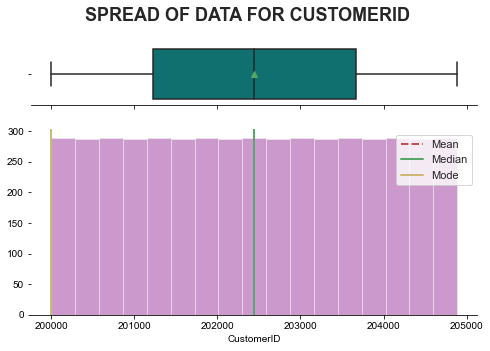

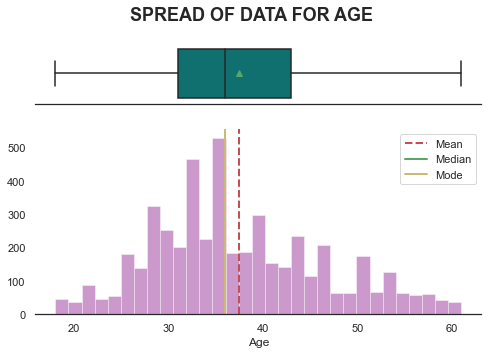

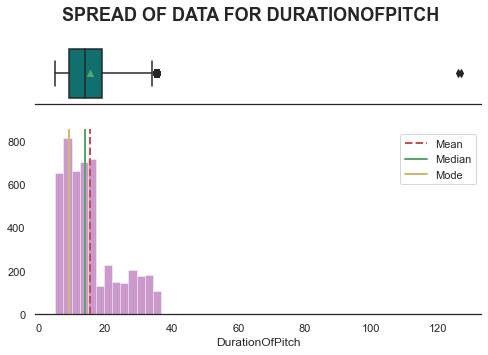

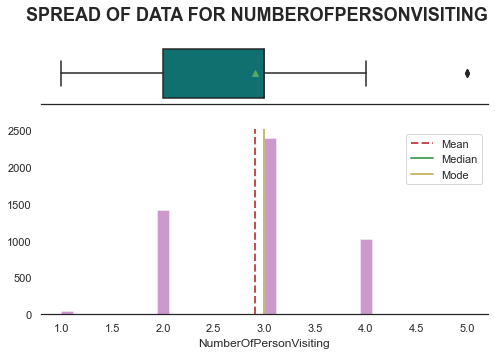

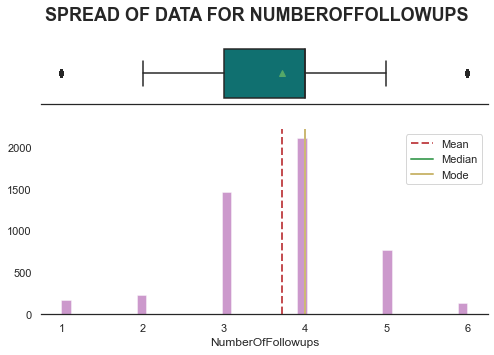

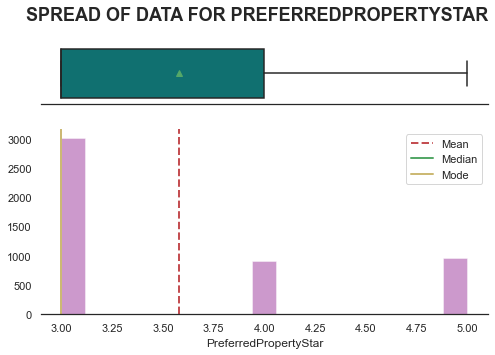

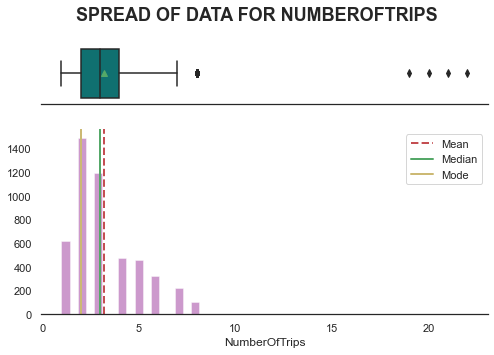

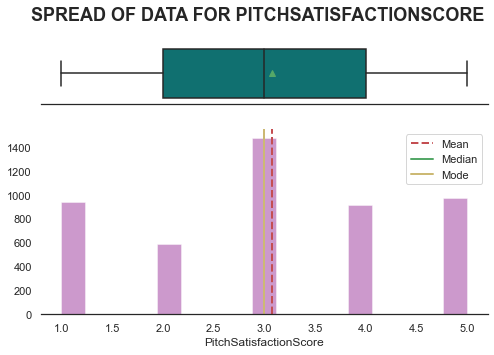

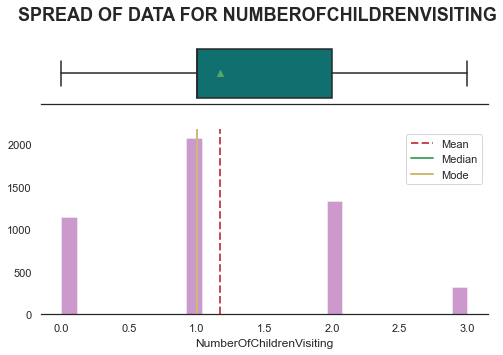

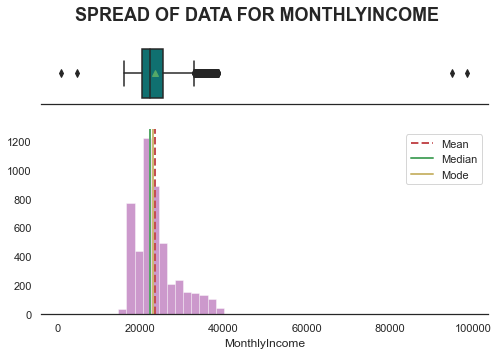

<IPython.core.display.Javascript object>

In [40]:
# select all quantitative columns for checking the spread
list_col = data.select_dtypes(include="number").columns.to_list()
for i in range(len(list_col)):
    dist_box(data[list_col[i]])

**Comments:**
- CustomerID needs to be dropped as it has no value to the prediction task.
- ProdTeaken is the target variable.
- Age is normally distrubted  and doesn't have any outliers
- Duration of pitch is Right skewed with some outliers at the higher end.Outlier treatment needed.
- Number of trips is right skewed with some outliers at the higher end.
- Monthly income is Right skewed and has some outlier as higher end.

##### Dropping the CustomerID 

In [41]:
data.drop(["CustomerID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

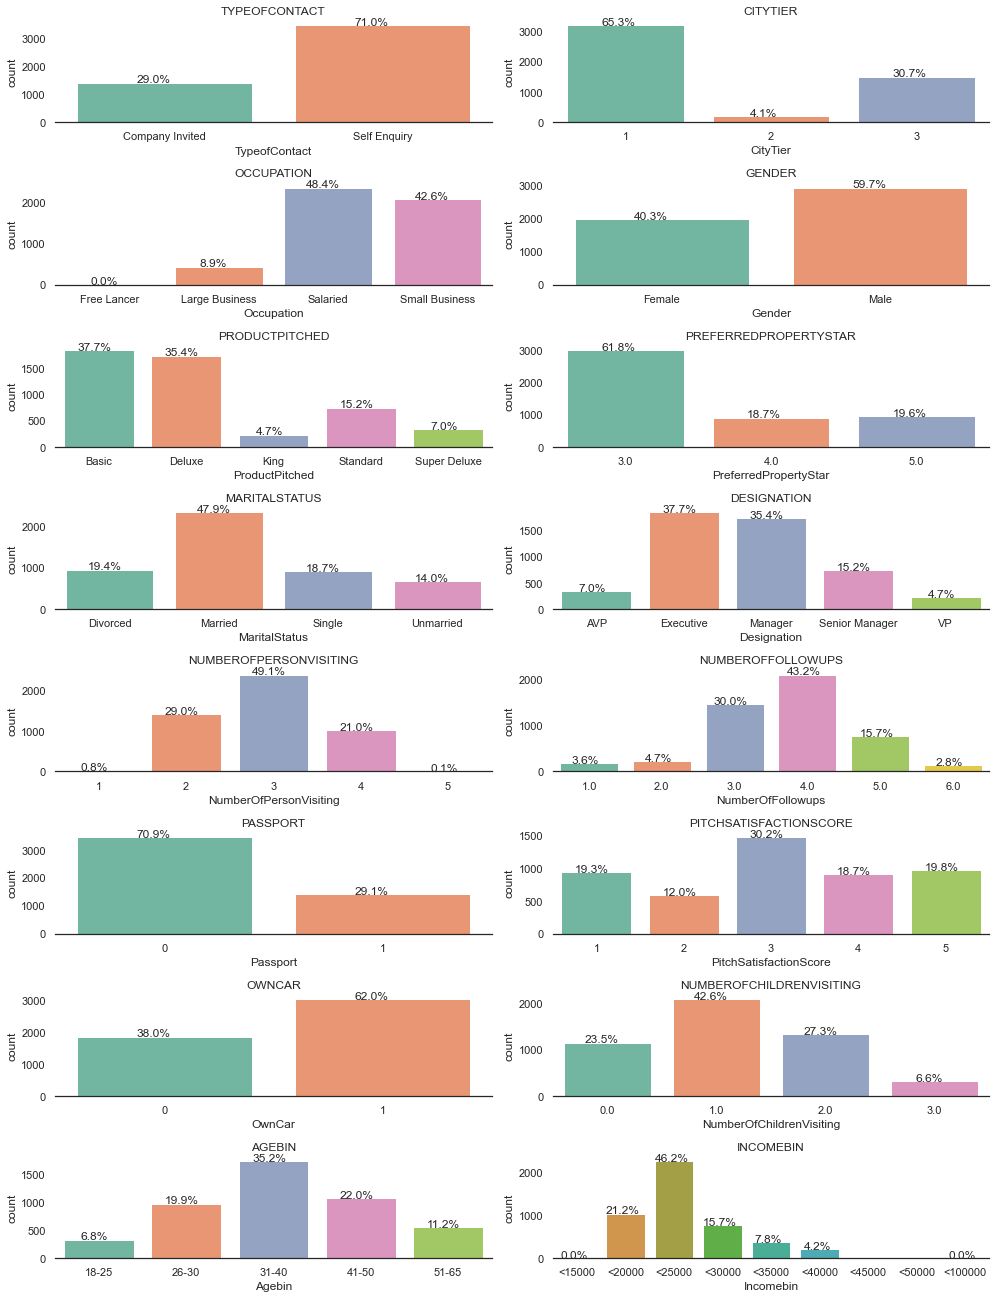

<IPython.core.display.Javascript object>

In [42]:
#### Univariate analysis for the categorical variables
plt.figure(figsize=(14, 20))

sns.set_theme(style="white")

cat_cols = [
    "TypeofContact",
    "CityTier",
    "Occupation",
    "Gender",
    "ProductPitched",
    "PreferredPropertyStar",
    "MaritalStatus",
    "Designation",
    "NumberOfPersonVisiting",
    "NumberOfFollowups",
    "Passport",
    "PitchSatisfactionScore",
    "OwnCar",
    "NumberOfChildrenVisiting",
    "Agebin",
    "Incomebin",
]


for i, variable in enumerate(cat_cols):
    plt.subplot(9, 2, i + 1)
    order = data[variable].value_counts(ascending=False).index
    # sns.set_palette(list_palette[i]) # to set the palette
    sns.set_palette("Set2")
    ax = sns.countplot(x=data[variable], data=data)
    sns.despine(top=True, right=True, left=True)  # to remove side line from graph
    for p in ax.patches:
        percentage = "{:.1f}%".format(100 * p.get_height() / len(data[variable]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y), ha="center")
    plt.tight_layout()
    plt.title(cat_cols[i].upper())

**Comments:**
- 3 is the highest pitch satisfaction score.
- Number of children visiting with 1 has the highest contribution of ~43%.
- ~38 % customers are Executive, followed by 35% are managers.
- ~18% customers accepted product offered last time.
- ~ 62 % customer own car.
- ~29 % customers has a passport.
- ~ 65 % customers are from Tier 1 cities.
- ~ 61 % customers prefer 3 star property. 
- ~ 48 % customers are married
- Basic package was pitched to ~ 38 % of customers and 35 % were pitched Deluxe package.
- 60 % customers are male.
- Occupation of ~ 49 % customer is  salaried.
- 70.5 % customer  self enquiried for the packages.
- Most of the customers travelled along with 3 people.
- Most of the customers take 2 trips per year but as seen previously there are some extreme values like 22.
- Most of the customers travelled with  only one child.
- Most of the customers were followed up 4 times.
- Majority  of customer monthly income is in 20000-25000 range.Most customer fall in 15000-30000 monthly income range.
- ~35% are in 31-40 Age group.  Most customer are in 26-50 age range

### Bivariate & Multivariate Analysis

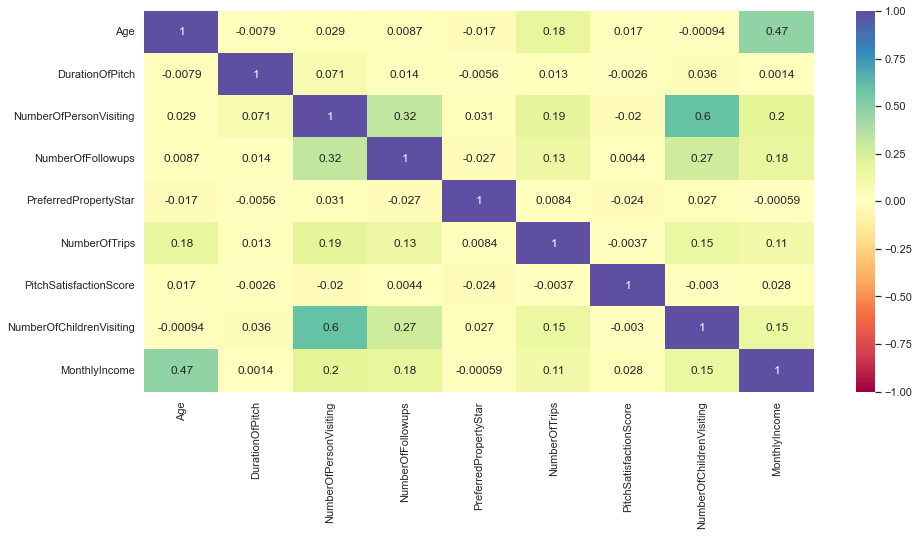

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

**Comments:**
- Age and Income have weak correlation with each other.
- Number of Person visiting and Numberof Children visiting have moderate correlation.
- NumberofFollowups and NumberofPersonVisitng have weak correlation with each other.
- Asides Age, Income, NumberofPersonvisitng and NumberOfChildrenVisiting, all other variables have relatively no correlation with each other

<Figure size 1080x504 with 0 Axes>

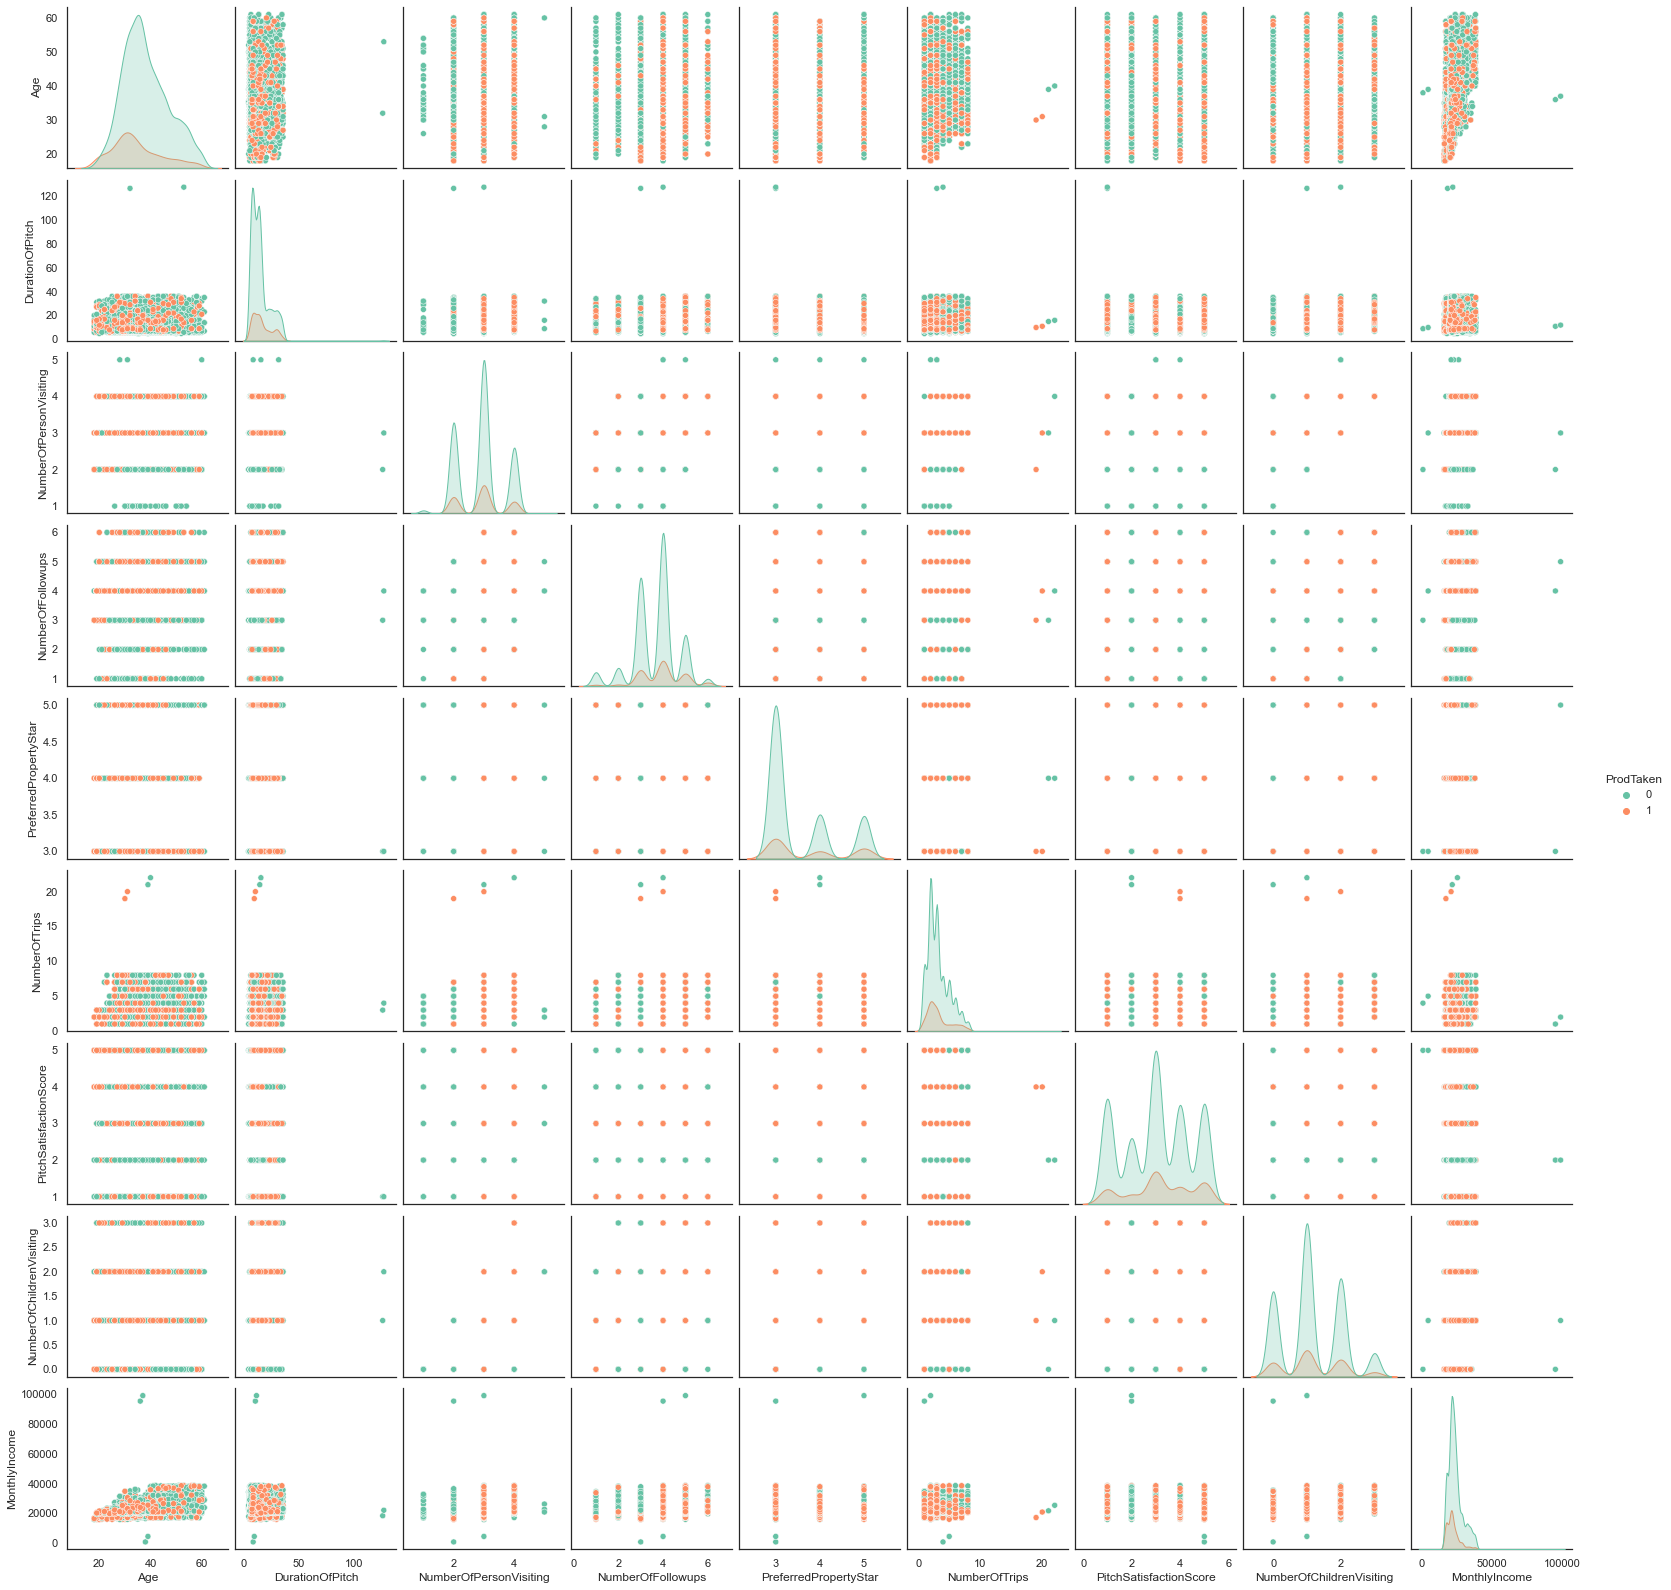

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(15, 7))
sns.pairplot(data=data, hue="ProdTaken")
plt.show()

* No clear relationship amongst the numerical variables. All have weak corrlation with each other.

#### Checking the association of ProductTaken with independent variables.

In [45]:
### Function to plot distributions and Boxplots of customers
def plot(x, target="ProdTaken"):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0, 0].set_title(
        f"Distribution of {x} \n of a customer who had Not taken Product",
        fontsize=12,
        fontweight="bold",
    )
    sns.distplot(data[(data[target] == 0)][x], ax=axs[0, 0], color="teal")
    axs[0, 1].set_title(
        f"Distribution of {x}\n of a customer who had taken Product",
        fontsize=12,
        fontweight="bold",
    )
    sns.distplot(data[(data[target] == 1)][x], ax=axs[0, 1], color="orange")
    axs[1, 0].set_title(
        f"Boxplot of {x} w.r.t Product taken", fontsize=12, fontweight="bold"
    )

    line = plt.Line2D(
        (0.1, 0.9), (0.5, 0.5), color="grey", linewidth=1.5, linestyle="--"
    )
    fig.add_artist(line)

    sns.boxplot(
        data[target], data[x], ax=axs[1, 0], palette="gist_rainbow", showmeans=True
    )
    axs[1, 1].set_title(
        f"Boxplot of {x} w.r.t Product Taken - Without outliers",
        fontsize=12,
        fontweight="bold",
    )
    sns.boxplot(
        data[target],
        data[x],
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
        showmeans=True,
    )  # turning off outliers from boxplot
    sns.despine(top=True, right=True, left=True)  # to remove side line from graph
    plt.tight_layout(pad=4)
    plt.show()

<IPython.core.display.Javascript object>

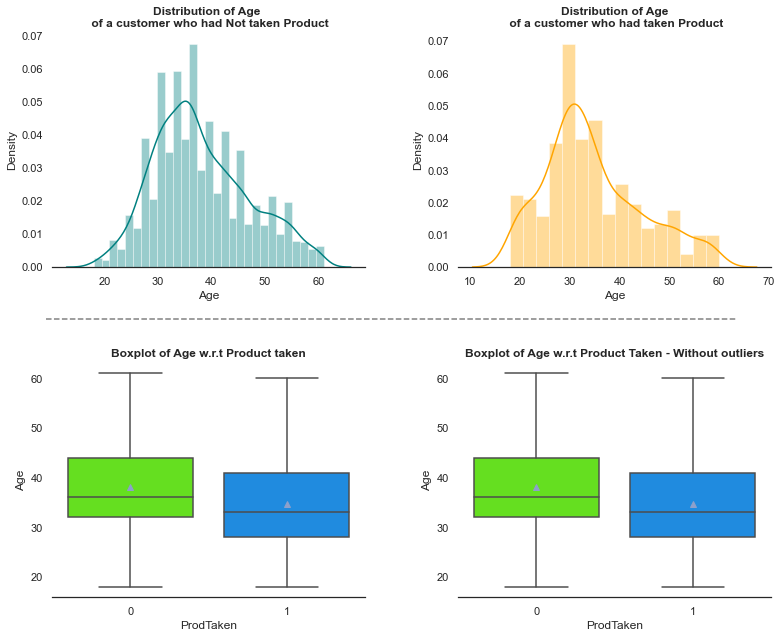

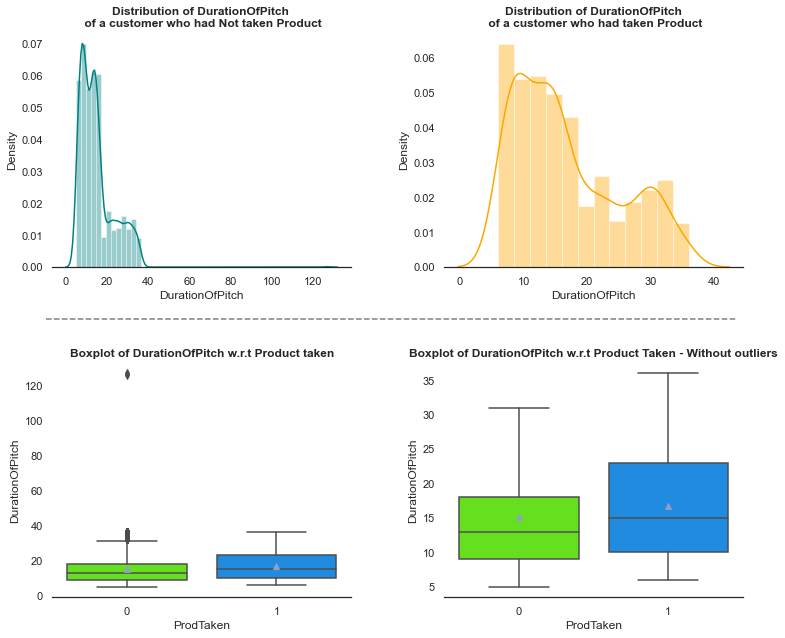

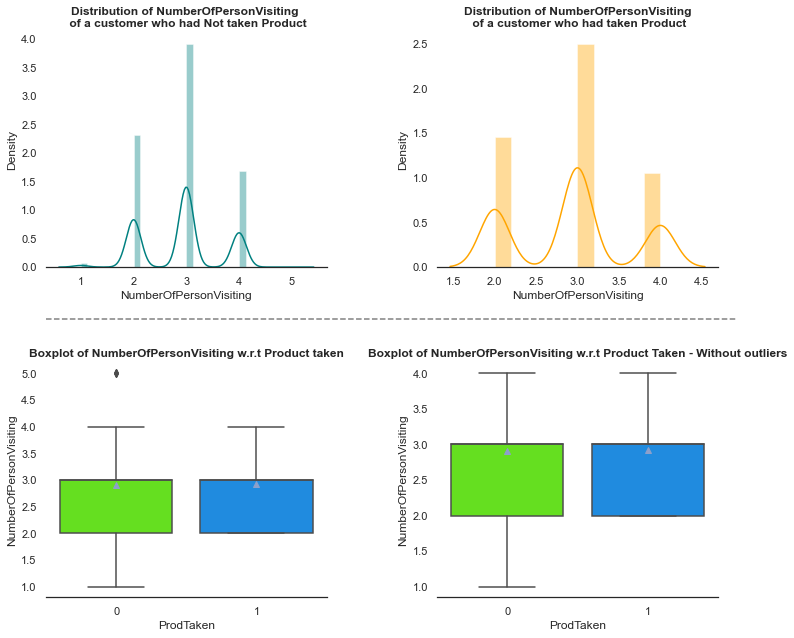

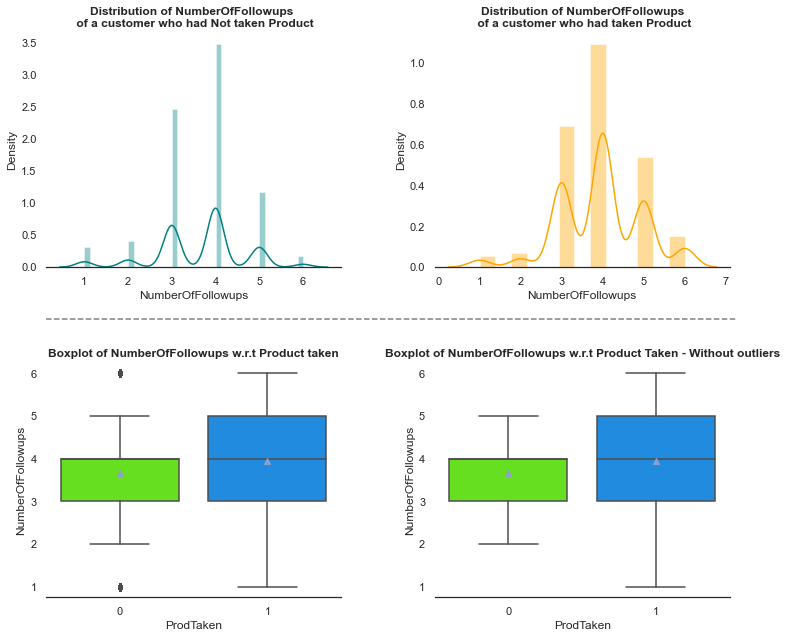

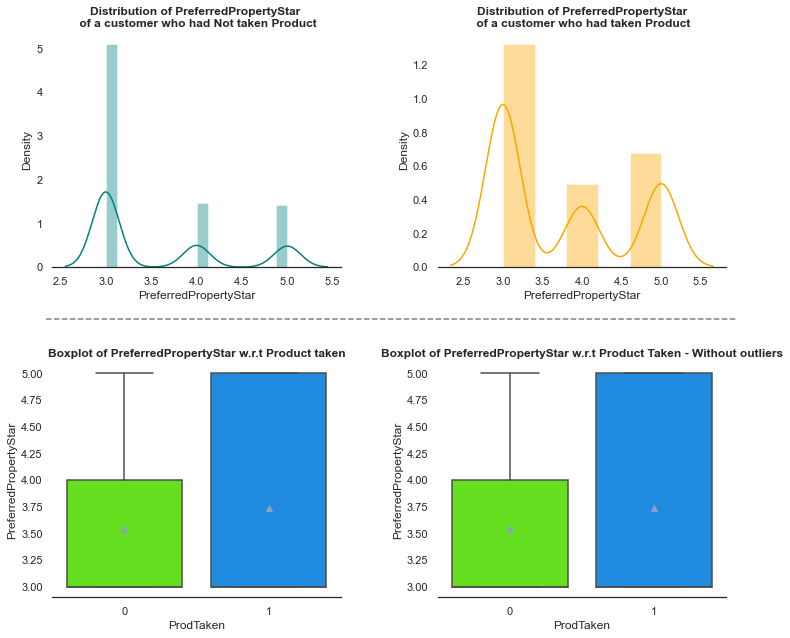

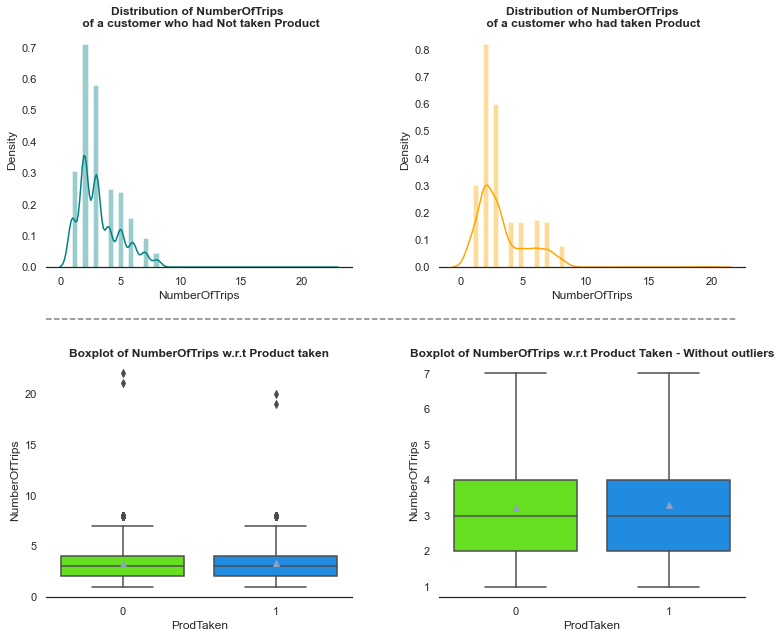

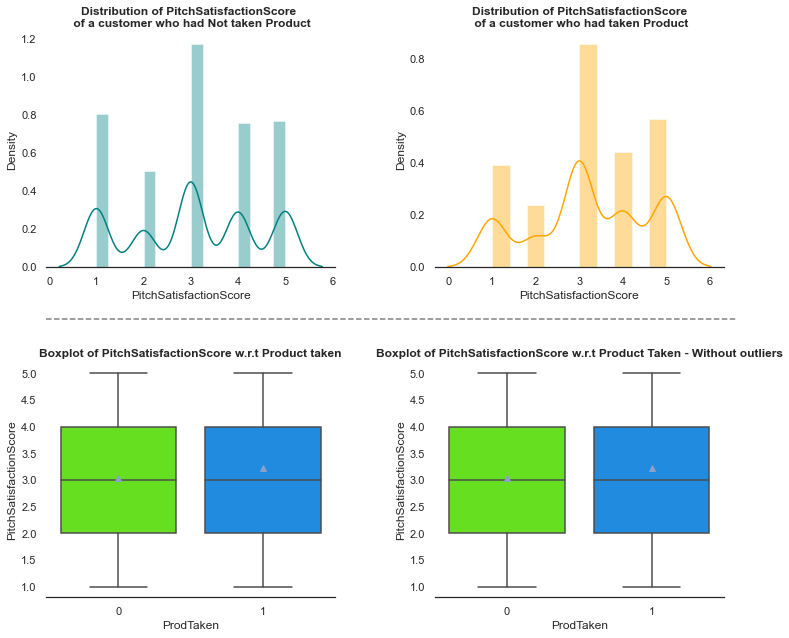

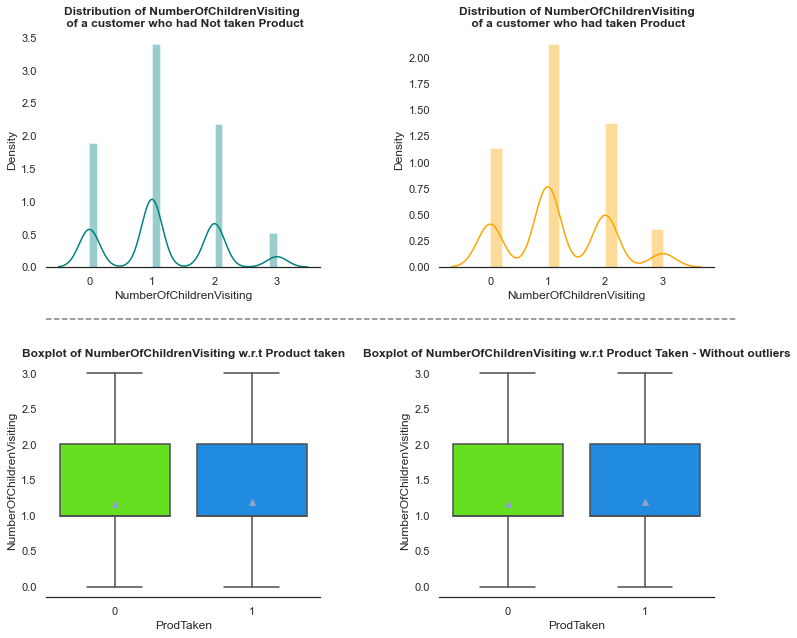

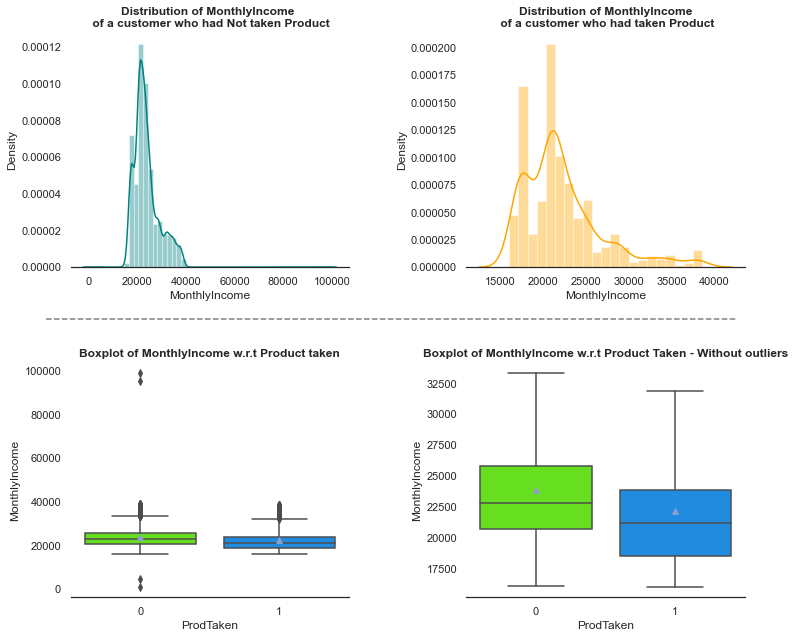

<IPython.core.display.Javascript object>

In [46]:
# select all quantitative columns for checking the spread
# list_col=  ['Age','DurationOfPitch','MonthlyIncome']
list_col = data.select_dtypes(include="number").columns.to_list()
# print(list_col)
# plt.figure(figsize=(14,23))
for j in range(len(list_col)):
    plot(list_col[j])

**Observation**
- Customers who purchased the product are mostly in age range of 28 -35. No clear disparity regarding the target variable in relation to the age distribution.
- Duration of pitch for customers who purchased products was within the range of 10- 40 min. There are some outliers in duration of pitch for customers who didn't take the product.
- Treating without outliers customers who picked up the products have higher duration of minutes than customers who did not pick.
- No clear disparity for Number of trips with respect to the product taken status. Outliers detected for both customers who picked the products or not.
- Monthly income has extreme outliers.Customers wh did not pick products have higher monthly income compared to customers who picked.

##### Influence of Age and Income on Product Taken

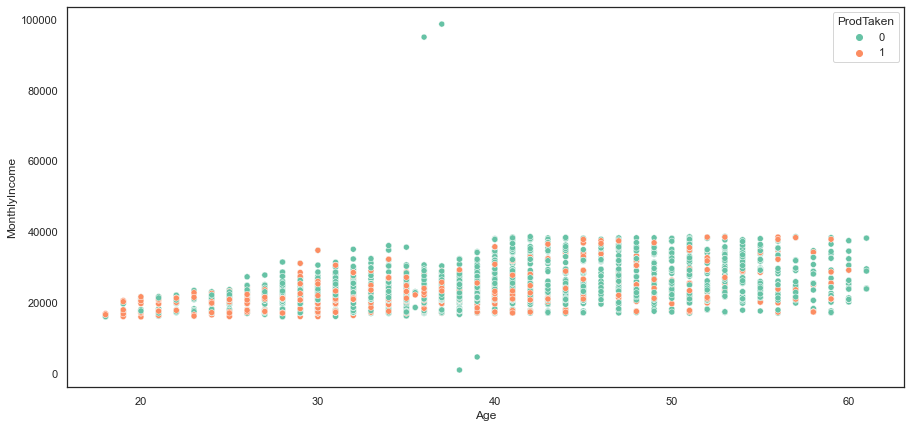

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x="Age", y="MonthlyIncome", hue="ProdTaken", data=data)

* No clear pattern regarding the relationship between Age,Income and ProductTaken

##### Categorical variable relationship with the target variable

In [48]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("nipy_spectral", 8))
    tab1 = pd.crosstab(x, data["ProdTaken"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["ProdTaken"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(7, 4))
    plt.xticks(rotation=360)
    labels = ["No", "Yes"]
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(
        loc="upper left", labels=labels, title="Product Taken", bbox_to_anchor=(1, 1)
    )
    sns.despine(top=True, right=True, left=True)  # to remove side line from graph
    # plt.legend(labels)
    plt.show()

<IPython.core.display.Javascript object>

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
------------------------------------------------------------------------------------------------------------------------


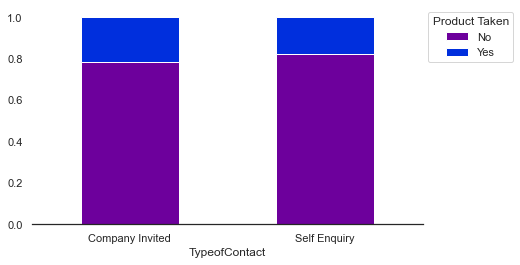

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


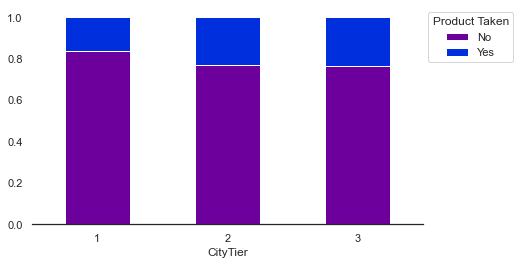

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


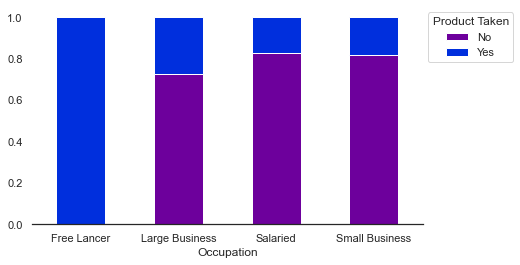

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


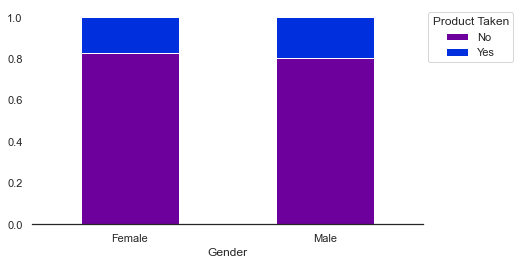

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
1                         39    0    39
2                       1151  267  1418
3                       1942  460  2402
4                        833  193  1026
5                          3    0     3
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


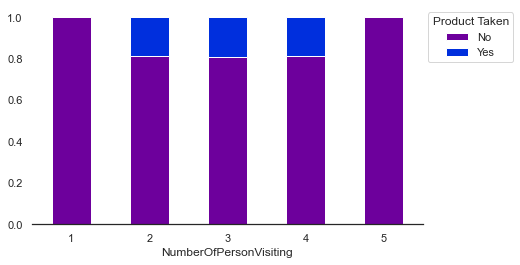

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


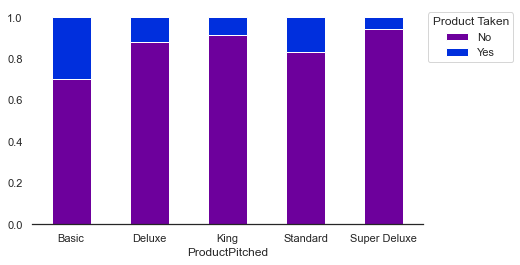

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2531  488  3019
4.0                     731  182   913
5.0                     706  250   956
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


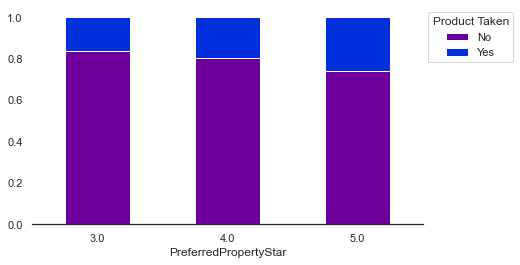

ProdTaken         0    1   All
NumberOfTrips                 
1.0             508  112   620
2.0            1186  305  1491
3.0             969  223  1192
4.0             417   61   478
5.0             396   62   458
6.0             258   64   322
7.0             156   62   218
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


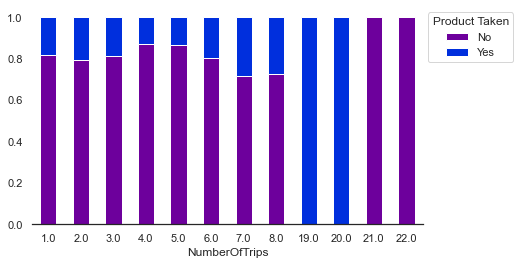

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


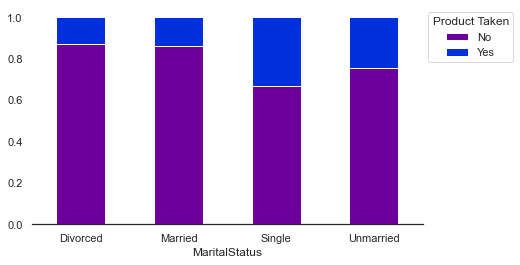

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


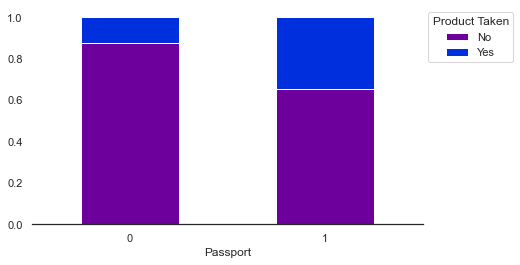

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


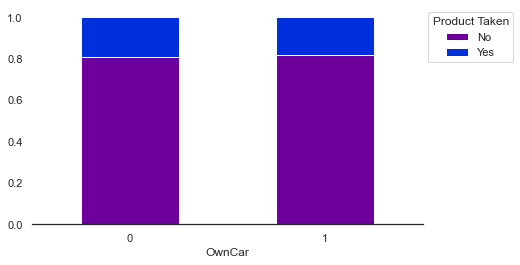

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


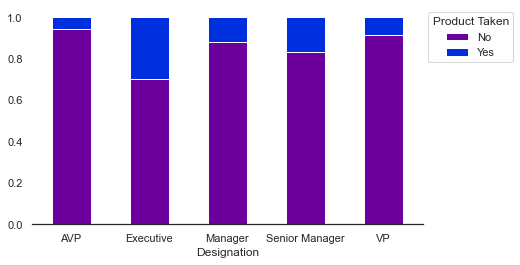

ProdTaken     0    1   All
Agebin                    
18-25       198  135   333
26-30       732  239   971
31-40      1461  261  1722
41-50       929  144  1073
51-65       460   89   549
All        3780  868  4648
------------------------------------------------------------------------------------------------------------------------


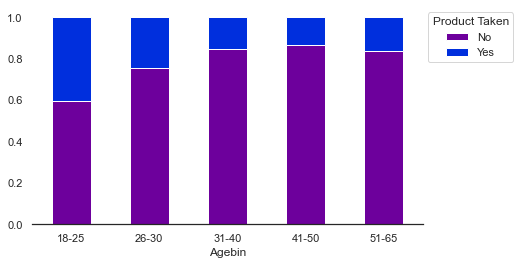

ProdTaken     0    1   All
Incomebin                 
<15000        2    0     2
<20000      754  284  1038
<25000     1830  427  2257
<30000      651  117   768
<35000      343   39   382
<40000      185   21   206
<100000       2    0     2
All        3767  888  4655
------------------------------------------------------------------------------------------------------------------------


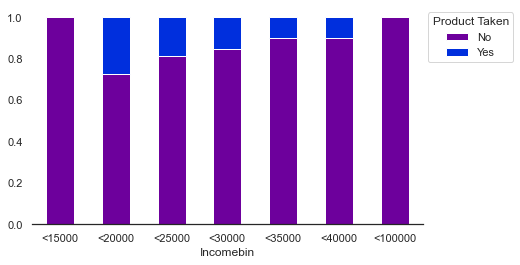

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


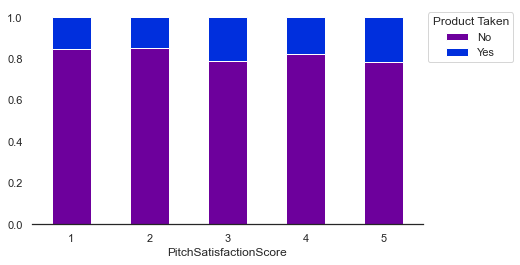

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1726  387  2113
5.0                 577  191   768
6.0                  82   54   136
All                3968  920  4888
------------------------------------------------------------------------------------------------------------------------


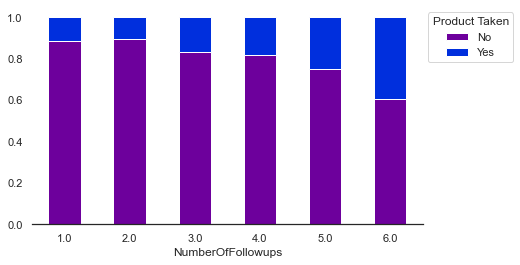

<IPython.core.display.Javascript object>

In [50]:
list_columns = [
    "TypeofContact",
    "CityTier",
    "Occupation",
    "Gender",
    "NumberOfPersonVisiting",
    "ProductPitched",
    "PreferredPropertyStar",
    "NumberOfTrips",
    "MaritalStatus",
    "Passport",
    "OwnCar",
    "Designation",
    "Agebin",
    "Incomebin",
    "PitchSatisfactionScore",
    "NumberOfFollowups",
]
for i, variable in enumerate(list_columns):
    stacked_plot(data[variable])

#### Cutomer Profile by ProductPitched

In [54]:
### customer who picked the products
profile_df = data[data["ProdTaken"] == 1]

<IPython.core.display.Javascript object>

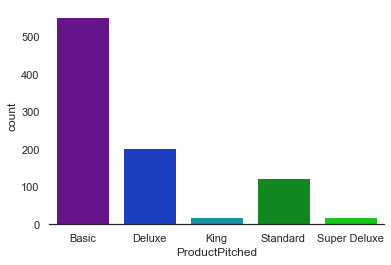

<IPython.core.display.Javascript object>

In [56]:
# plt.figure(figsize= [12,12])

sns.countplot(x="ProductPitched", data=profile_df)
sns.despine(top=True, right=True, left=True)  # to remove side line from graph

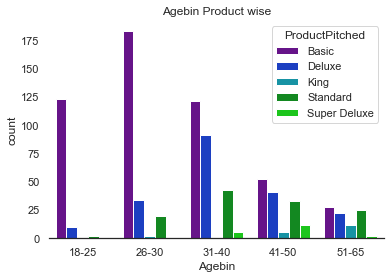

<IPython.core.display.Javascript object>

In [55]:
## Agebin profiling
sns.countplot(x='Agebin',hue='ProductPitched',data=profile_df).set_title('Agebin Product wise')
sns.despine(top=True,right=True,left=True) # to remove side line from graph



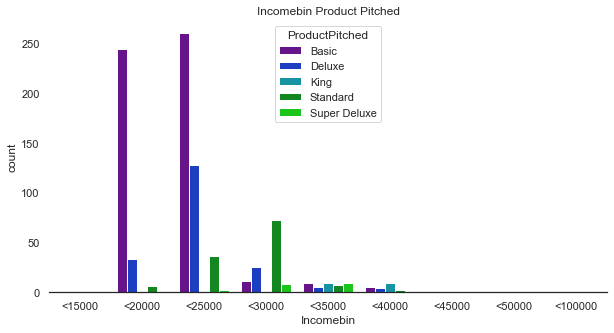

<IPython.core.display.Javascript object>

In [58]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Incomebin',hue='ProductPitched',data=profile_df).set_title('Incomebin Product Pitched')
sns.despine(top=True,right=True,left=True) # to remove side line from graph



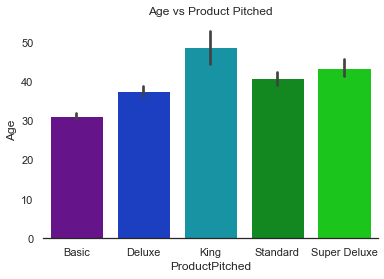

<IPython.core.display.Javascript object>

In [60]:
sns.barplot(y='Age',x='ProductPitched',data=profile_df).set_title('Age vs Product Pitched')
sns.despine(top=True,right=True,left=True) # to remove side line from graph


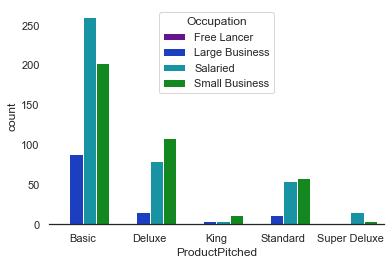

<IPython.core.display.Javascript object>

In [61]:
sns.countplot(x="ProductPitched", data=profile_df, hue="Occupation")
sns.despine(top=True, right=True, left=True)  # to remove side line from graph

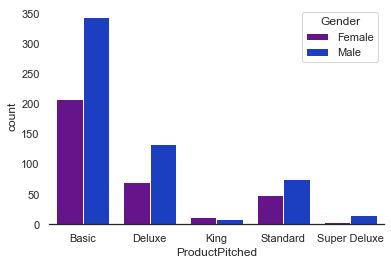

<IPython.core.display.Javascript object>

In [62]:
sns.countplot(x="ProductPitched", data=profile_df, hue="Gender")
sns.despine(top=True, right=True, left=True)  # to remove side line from graph

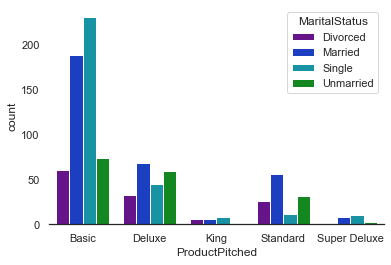

<IPython.core.display.Javascript object>

In [63]:
sns.countplot(x="ProductPitched", data=profile_df, hue="MaritalStatus")
sns.despine(top=True, right=True, left=True)  # to remove side line from graph

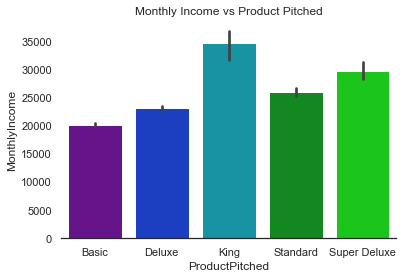

<IPython.core.display.Javascript object>

In [64]:
sns.barplot(y="MonthlyIncome", x="ProductPitched", data=profile_df).set_title(
    "Monthly Income vs Product Pitched"
)
sns.despine(top=True, right=True, left=True)  # to remove side line from graph

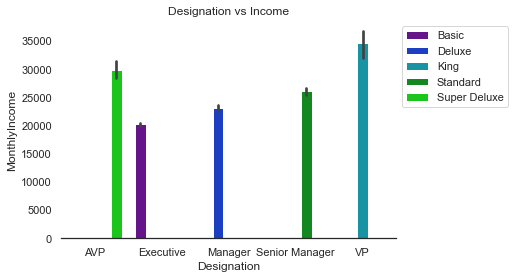

<IPython.core.display.Javascript object>

In [65]:
sns.barplot(
    x="Designation", y="MonthlyIncome", data=profile_df, hue="ProductPitched"
).set_title("Designation vs Income")
sns.despine(top=True, right=True, left=True)  # to remove side line from graph
plt.legend(bbox_to_anchor=(1, 1))

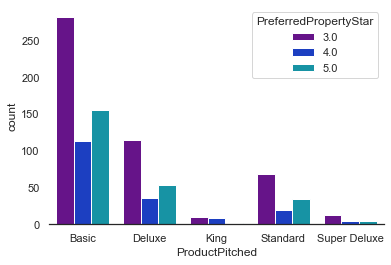

<IPython.core.display.Javascript object>

In [66]:
sns.countplot(x="ProductPitched", data=profile_df, hue="PreferredPropertyStar")
sns.despine(top=True, right=True, left=True)  # to remove side line from graph

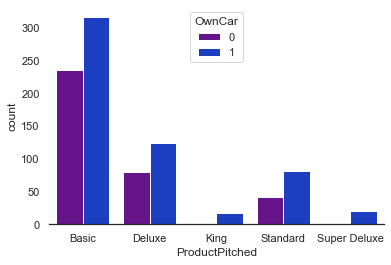

<IPython.core.display.Javascript object>

In [67]:
sns.countplot(x="ProductPitched", data=profile_df, hue="OwnCar")
sns.despine(top=True, right=True, left=True)  # to remove side line from graph

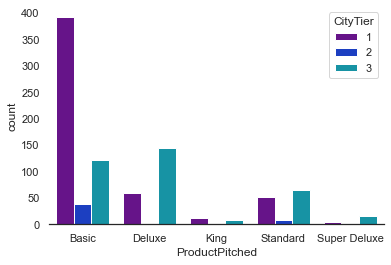

<IPython.core.display.Javascript object>

In [68]:
sns.countplot(x="ProductPitched", data=profile_df, hue="CityTier")
sns.despine(top=True, right=True, left=True)  # to remove side line from graph

In [70]:
profile_df.groupby(["ProductPitched"]).agg(
    {
        "MonthlyIncome": {"mean", "min", "median", "max"},
        "Age": {"mean", "min", "median", "max"},
    }
)

MonthlyIncome                                          Age  \
                         min      median         max        mean      min   
ProductPitched                                                              
Basic            16009.00000 20582.00000 37868.00000 20179.10870 18.00000   
Deluxe           17086.00000 22964.00000 38525.00000 23093.33333 21.00000   
King             17517.00000 34859.00000 38537.00000 34672.10000 27.00000   
Standard         17372.00000 25711.00000 38395.00000 26035.41935 19.00000   
Super Deluxe     21151.00000 29802.50000 37502.00000 29823.80000 39.00000   

                                           
                 median      max     mean  
ProductPitched                             
Basic          30.00000 59.00000 31.26449  
Deluxe         35.75000 59.00000 37.59069  
King           52.50000 59.00000 48.90000  
Standard       38.00000 60.00000 40.99194  
Super Deluxe   42.00000 56.00000 43.50000

<IPython.core.display.Javascript object>

### Customer profile according to product pitched and product purchased
**Basic package :**Most of the customer have Monthly income < 21000, Age range is in range of  26-31, Designation as Executive belong to City tier 1, are salaried and single males . Customer contacted the company.Married customers also prefer this basic package. Basis package have the least property preferred star meaning it's affordable.

**Deluxe package:** Most of the customer have Monthly income < 25000, Age is in range of 31-40, Designation as Managers belong to city tier 3 and occupation is small business and married .Customer contacted the company. City tier 1 and divorced customers also preferred this package.


**King :** Most of the customer have  Monthly income  in range of  30000-35000, age range in 51-60,  Designation as VP. Belong to city tier 1 and are single female  and  Occupation is small business.Females buy this package more than men.

**SuperDeluxe:** Most of the customer have  Monthly income < 35000, Age is in range 41-50, Designation as AVP,  belongs to tier city 3 and is Single, male and occupation is salaried. Majority of them  were company invited

**Standard package:** Most of the customer have Monthly income  <30000,Age is in range of 31-40 , Designation as Senior Manager, is married , from tier city 3,and occupation is small business. majority of them had self inquired.



#### Insights from the EDA

* Single and unmarried people has higher chance of purchasing the travel package.
* Customers mostly purchased the travel package when marketing team did high number of followups,higher duration of pitch , and pitched Basic product.
* Company invited customers mostly purchased packages and preferred 5 star rated properties and were mostly from city tier   2,3.
* Customer from 18-25 age purchased the product taken, followed by  26-30
- Mostly customer visting with 2,3,4 travellers purchased the product
- Customers who were pitched basic package mostly  brought the product , followed by standard. Reason might be its less expensive.
- Mostly Customers who had passport bought the product.
- Most of the customers who bought the product were Executive and Senior manager
- Customers who were followed up 6 times had purchases the product
* Customers who learn from 15000-20000 purchased product followed by customers in income range 20000-25000.
* FreeLancers(need more data to conclude) and Large Business owners have higher chance of purchasing the travel package
* Having a passport increased chances of purchasing the package.
* Customers who took 7/8 trips had higher chances of purchaing the packages
* Gender,number of children visiting, having a car seemed to be insignificant.




### Outlier Detection and Treatment 

In [72]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Age                        0.00000
DurationOfPitch            2.29133
NumberOfPersonVisiting     0.06137
NumberOfFollowups          6.38298
PreferredPropertyStar      0.00000
NumberOfTrips              2.22995
PitchSatisfactionScore     0.00000
NumberOfChildrenVisiting   0.00000
MonthlyIncome              7.52864
dtype: float64

<IPython.core.display.Javascript object>

* DurationOfPitch, NumberOfFollowUps, NumberofTrips and MonthlyIncome have significant outliers that need to be treated

In [78]:
# Treating of the outliers using clipping method

# Applying the outlier treatment function and excluding the transformed variables and Year, mileage and seats.
p25 = data[
    ["DurationOfPitch", "NumberOfFollowups", "NumberOfTrips", "MonthlyIncome"]
].quantile(
    0.25
)  # Lower whisker boundary
p75 = data[
    ["DurationOfPitch", "NumberOfFollowups", "NumberOfTrips", "MonthlyIncome"]
].quantile(
    0.75
)  # Upper Whisker Boundary
data[["DurationOfPitch", "NumberOfFollowups", "NumberOfTrips", "MonthlyIncome"]] = data[
    ["DurationOfPitch", "NumberOfFollowups", "NumberOfTrips", "MonthlyIncome"]
].clip(p25, p75, axis=1)

<IPython.core.display.Javascript object>

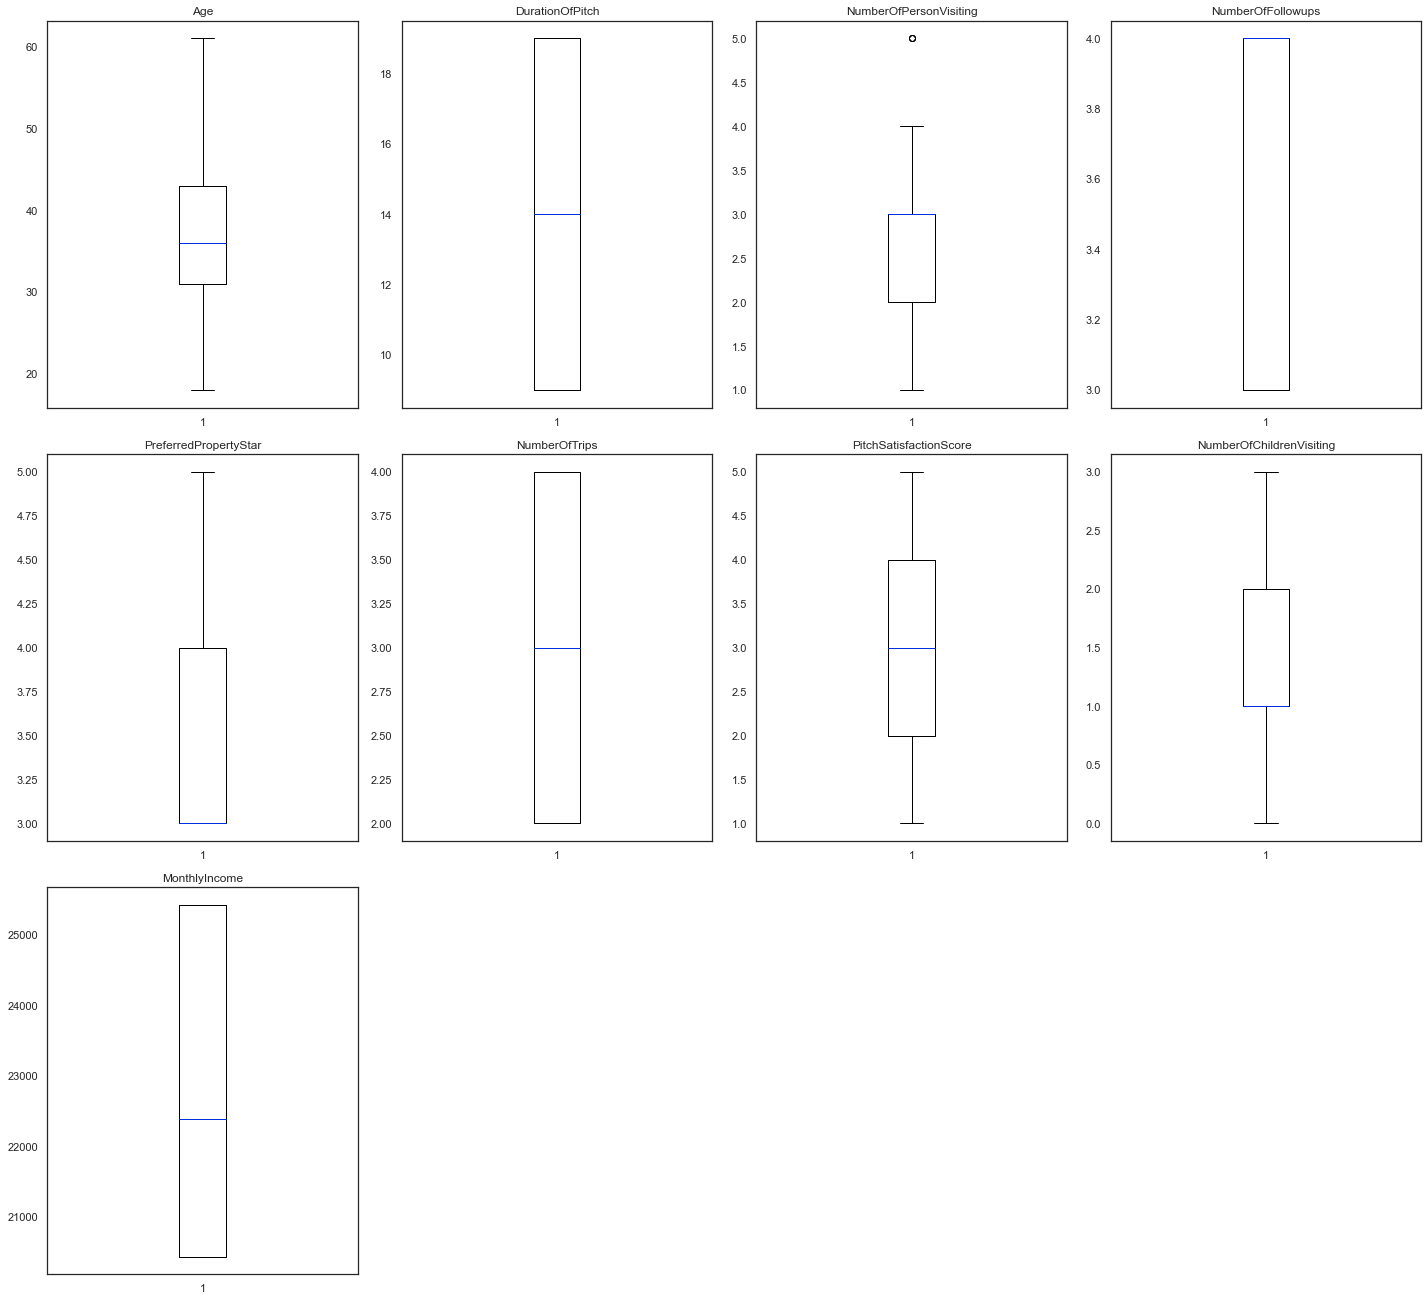

<IPython.core.display.Javascript object>

In [79]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Outliers have been treated adequately

In [80]:
### Checking the dataset before model building
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   object  
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

<IPython.core.display.Javascript object>

In [83]:
### Dropping  Agebin and Incomebin
data.drop(["Agebin", "Incomebin"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Data Preparation

#### Splitting the dataset 

In [84]:
# Separating target column - assuming the following attributes will not be available for new and potential customers
X = data.drop(
    [
        "ProdTaken",
        "PitchSatisfactionScore",
        "ProductPitched",
        "NumberOfFollowups",
        "DurationOfPitch",
    ],
    axis=1,
)
X = pd.get_dummies(X, drop_first=True)
y = data["ProdTaken"]

<IPython.core.display.Javascript object>

In [85]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(3421, 22) (1467, 22)


<IPython.core.display.Javascript object>

In [86]:
y.value_counts(1)

0   0.81178
1   0.18822
Name: ProdTaken, dtype: float64

<IPython.core.display.Javascript object>

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting customer will pick the product and the customer does not pick the product -- Loss of resources
2. Predicting customer will not pick the product and the customer does pick the product -- Loss of opportunity

### Which case is more important? 
* Both instance are important because loss of resources means the company will incur lots of marketing expense and not predicting the right customers will mean the company will not be able to plan properly but loss of rescources have more impact because of the marketing cost.

### How to reduce this loss i.e need to reduce False Negatives?
* Recall needs to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives.

In [96]:
def make_confusion_matrix(y_actual, y_predict, title):
    """Plot confusion matrix"""
    fig, ax = plt.subplots(1, 1)

    cm = confusion_matrix(y_actual, y_predict, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
    disp.plot(cmap="Greens", ax=ax)

    ax.set_title(title)
    plt.tick_params(axis=u"both", which=u"both", length=0)
    plt.grid(b=None, axis="both", which="both", visible=False)
    plt.show()

<IPython.core.display.Javascript object>

In [97]:
def get_metrics_score(
    model, X_train_df, X_test_df, y_train_pass, y_test_pass, flag=True
):
    """
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    """
    # defining an empty list to store train and test results
    score_list = []
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass, pred_train)
    test_acc = accuracy_score(y_test_pass, pred_test)
    train_recall = recall_score(y_train_pass, pred_train)
    test_recall = recall_score(y_test_pass, pred_test)
    train_precision = precision_score(y_train_pass, pred_train)
    test_precision = precision_score(y_test_pass, pred_test)
    train_f1 = f1_score(y_train_pass, pred_train)
    test_f1 = f1_score(y_test_pass, pred_test)
    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
        )
    )
    if flag == True:
        metric_names = [
            "Train_Accuracy",
            "Test_Accuracy",
            "Train_Recall",
            "Test_Recall",
            "Train_Precision",
            "Test_Precision",
            "Train_F1-Score",
            "Test_F1-Score",
        ]
        cols = ["Metric", "Score"]
        records = [(name, score) for name, score in zip(metric_names, score_list)]
        display(pd.DataFrame.from_records(records, columns=cols, index="Metric").T)
        make_confusion_matrix(y_train_pass, pred_train, "Confusion Matrix for Train")
        make_confusion_matrix(y_test_pass, pred_test, "Confusion Matrix for Test")
    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

In [98]:
# # defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []


def add_score_model(score):
    """add score of modelto list"""
    acc_train.append(score[0])
    acc_test.append(score[1])
    recall_train.append(score[2])
    recall_test.append(score[3])
    precision_train.append(score[4])
    precision_test.append(score[5])
    f1_train.append(score[6])
    f1_test.append(score[7])

<IPython.core.display.Javascript object>

### Model Building - Bagging

Decision Tree and BaggingClassifier and Randomforest  models will be trained on the dataset and their performance will be observed

#### Decision Tree

In [99]:
dtree = DecisionTreeClassifier(random_state=1, class_weight={0: 0.20, 1: 0.80})
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

<IPython.core.display.Javascript object>

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.00000,0.87526,1.00000,0.60145,1.00000,0.69456,1.00000,0.64466


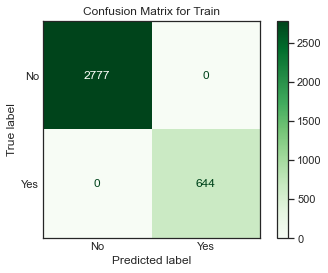

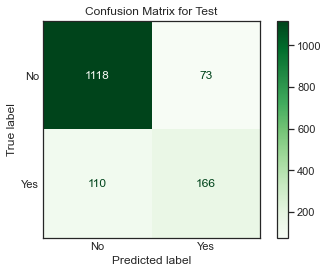

<IPython.core.display.Javascript object>

In [100]:
dtree_score = get_metrics_score(dtree, X_train, X_test, y_train, y_test)
add_score_model(dtree_score)

**Comments:**

Decision tree is overfitting the training data as there is lot of disparity between test and train.Recall, Precision and F1 scores are not that high



#### Bagging classifier

In [101]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.99094,0.89775,0.95497,0.56522,0.99676,0.83871,0.97542,0.67532


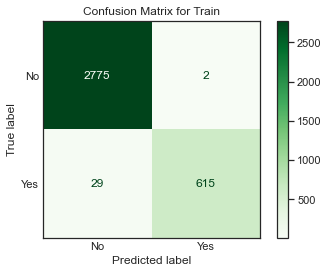

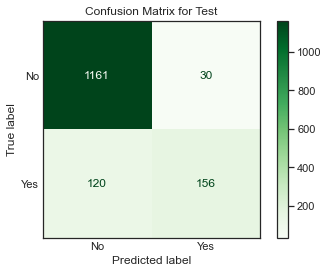

<IPython.core.display.Javascript object>

In [102]:
bagging_score = get_metrics_score(bagging_classifier, X_train, X_test, y_train, y_test)
add_score_model(bagging_score)

**Comments:**

Bagging is overfitting the training data , evaluation metric scores for test data decreased

### RandomForest

In [104]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.00000,0.89502,1.00000,0.48913,1.00000,0.91216,1.00000,0.63679


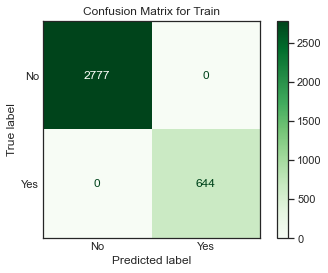

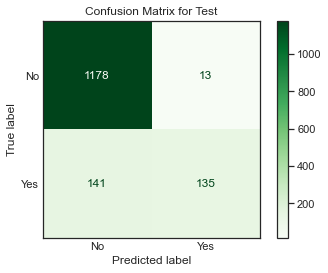

<IPython.core.display.Javascript object>

In [105]:
score_list_rf = get_metrics_score(rf_estimator, X_train, X_test, y_train, y_test)
add_score_model(score_list_rf)

* Random Forest is also overfitting the dataset

#### Tuning Decision Trees

In [106]:
# Choose the type of classifier.
dtree_tuned = DecisionTreeClassifier(class_weight={0: 0.20, 1: 0.80}, random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [1, 4, 7, 15],
    "min_samples_leaf": [2, 3, 5],
    "max_leaf_nodes": [5, 7, 10, 15],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=7,
                       max_leaf_nodes=15, min_samples_leaf=2, random_state=1)

<IPython.core.display.Javascript object>

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.79830,0.80709,0.59938,0.62319,0.47188,0.49003,0.52804,0.54864


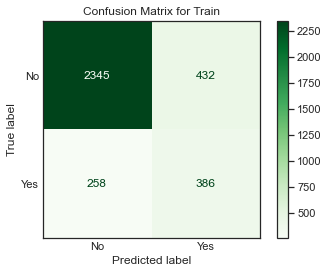

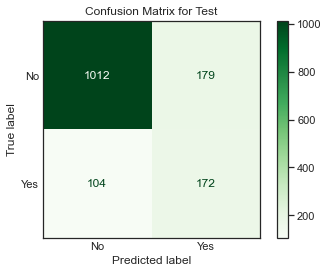

<IPython.core.display.Javascript object>

In [107]:
score_tune_dt = get_metrics_score(dtree_tuned, X_train, X_test, y_train, y_test)
add_score_model(score_tune_dt)  # add score to dataframe

* Tuning the Decision Tree gave a more generalized model. However, the metrics scores for recall, precision and f1-scores is low

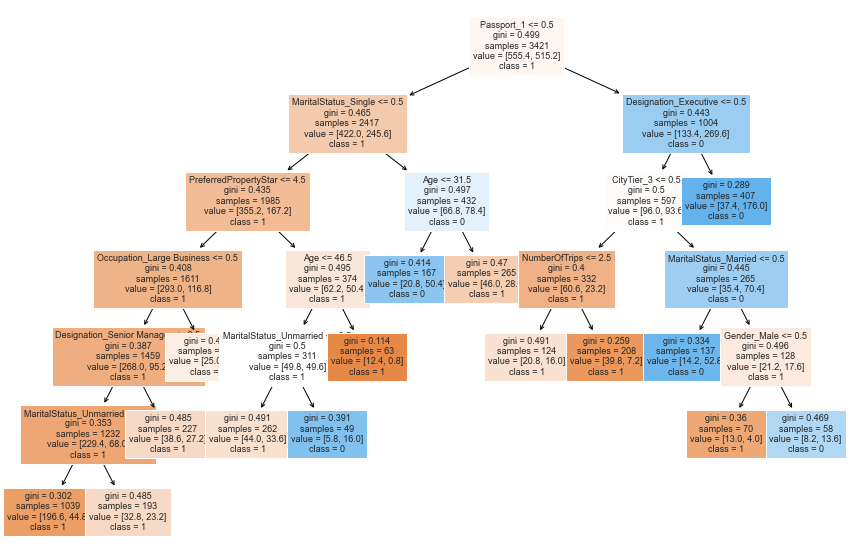

<IPython.core.display.Javascript object>

In [108]:
plt.figure(figsize=(15, 10))
feature_names = X_train.columns
out = tree.plot_tree(
    dtree_tuned,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    class_names=["1", "0"],
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

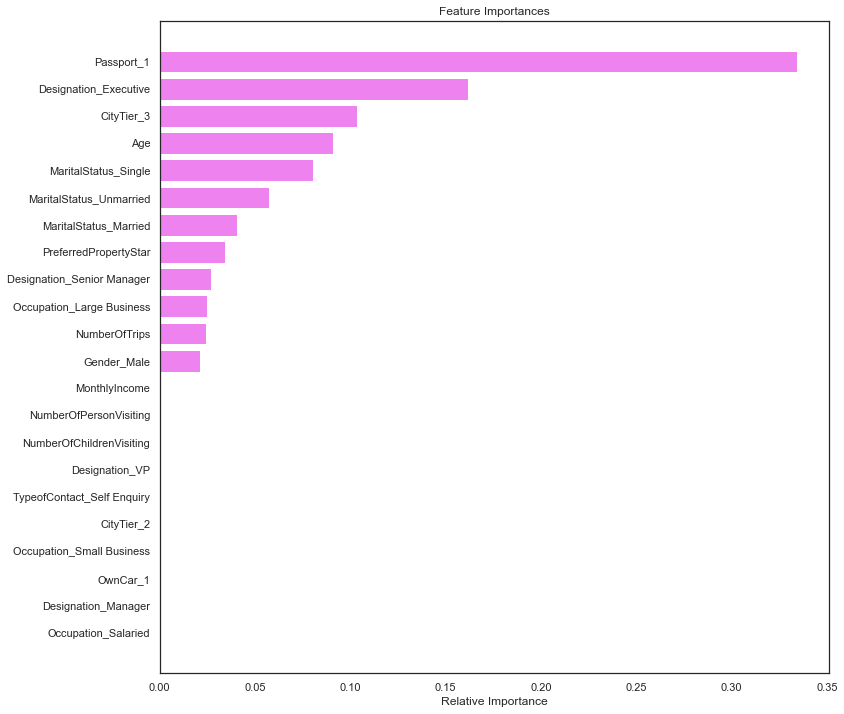

<IPython.core.display.Javascript object>

In [110]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Most Important features are passport , Desgination as Executive,City tier 3.

### Tuning Random Forest

In [111]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(class_weight={0: 0.20, 1: 0.80}, random_state=1)

parameters = {
    "max_depth": [5, 9, 15],
    "n_estimators": [150, 200, 250, 500],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": ["auto"],
    "max_samples": np.arange(0.3, 0.5, 0.7),
}
# parameters = {"n_estimators": [50,80,150],
#               "max_depth": [1,2,3],
#               "min_samples_split": [3,4,6,7],"max_features": ['auto'],
#              }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       max_samples=0.3, min_samples_leaf=9, n_estimators=500,
                       random_state=1)

<IPython.core.display.Javascript object>

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.82461,0.82822,0.61335,0.62681,0.52949,0.53727,0.56835,0.57860


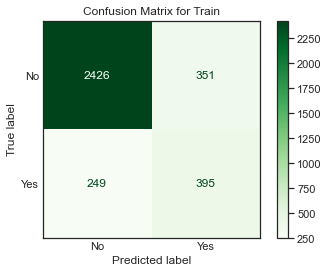

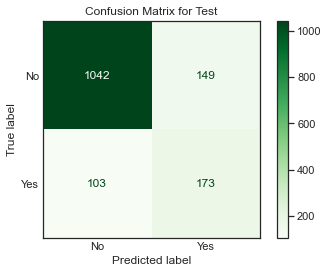

<IPython.core.display.Javascript object>

In [112]:
score_tune_rt = get_metrics_score(rf_tuned, X_train, X_test, y_train, y_test)
add_score_model(score_tune_rt)

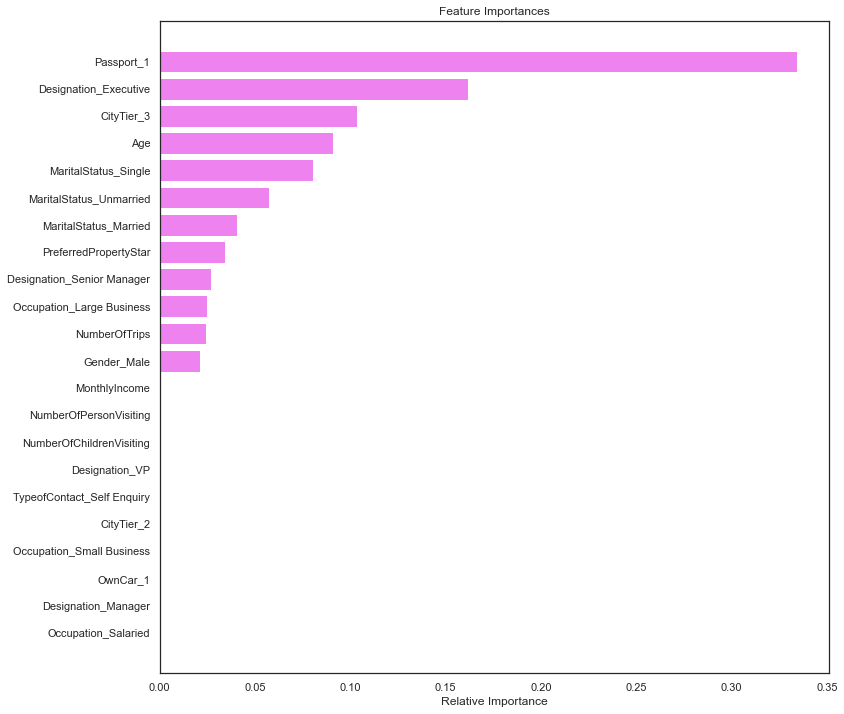

<IPython.core.display.Javascript object>

In [113]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Tuned RandomForest Model also gave a more generalized model compared to the untuned one.
* Important features are Passport,Monthly Income,Age, designation executive.

### Tuning Bagging Classifier

In [114]:
# Choose the type of classifier.

bagging_estimator_tuned = BaggingClassifier(
    DecisionTreeClassifier(class_weight={0: 0.20, 1: 0.80}, random_state=1),
    random_state=1,
)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                      1: 0.8},
                                                        random_state=1),
                  max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

<IPython.core.display.Javascript object>

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.99971,0.89230,0.99845,0.47826,1.00000,0.90411,0.99922,0.62559


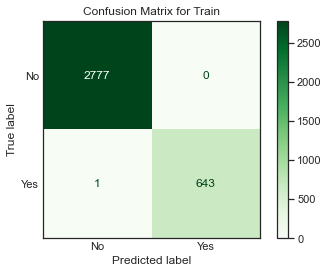

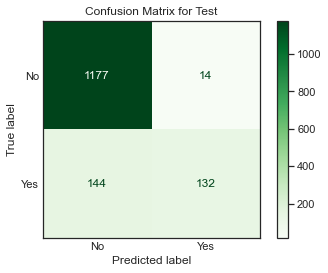

<IPython.core.display.Javascript object>

In [115]:
bagging_tuned = get_metrics_score(
    bagging_estimator_tuned, X_train, X_test, y_train, y_test
)
add_score_model(bagging_tuned)

In [116]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Decision Tree",
            "Bagging Classifier",
            "Random Forest",
            "Tuned Decision Tree",
            "Tuned Random Forest",
            "Tuned Bagging Classifier",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
4,Tuned Random Forest,0.82461,0.82822,0.61335,0.62681,0.52949,0.53727,0.56835,0.57860
3,Tuned Decision Tree,0.79830,0.80709,0.59938,0.62319,0.47188,0.49003,0.52804,0.54864
0,Decision Tree,1.00000,0.87526,1.00000,0.60145,1.00000,0.69456,1.00000,0.64466
1,Bagging Classifier,0.99094,0.89775,0.95497,0.56522,0.99676,0.83871,0.97542,0.67532
2,Random Forest,1.00000,0.89502,1.00000,0.48913,1.00000,0.91216,1.00000,0.63679
5,Tuned Bagging Classifier,0.99971,0.89230,0.99845,0.47826,1.00000,0.90411,0.99922,0.62559


<IPython.core.display.Javascript object>

#### Model Building - Boosting

#### ADA Boosting

In [117]:
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.83923,0.84594,0.25466,0.27536,0.70085,0.74510,0.37358,0.40212


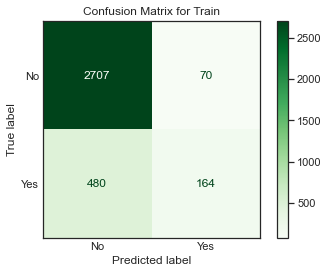

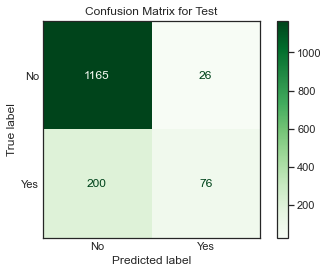

<IPython.core.display.Javascript object>

In [118]:
adaboost_score = get_metrics_score(adaboost, X_train, X_test, y_train, y_test)
add_score_model(adaboost_score)

#### Gradient Boosting

In [119]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.87752,0.86708,0.42547,0.38406,0.84830,0.80916,0.56670,0.52088


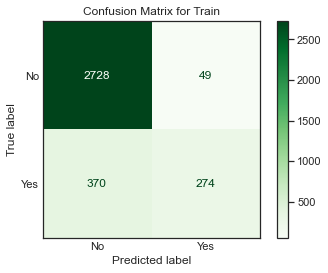

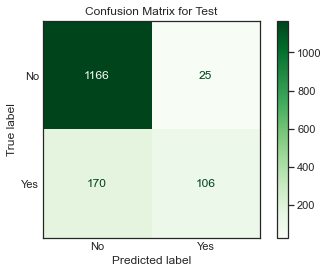

<IPython.core.display.Javascript object>

In [120]:
gbc_score = get_metrics_score(gbc, X_train, X_test, y_train, y_test)
add_score_model(gbc_score)

In [121]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.99503,0.89775,0.97360,0.60145,1.00000,0.80583,0.98662,0.68880


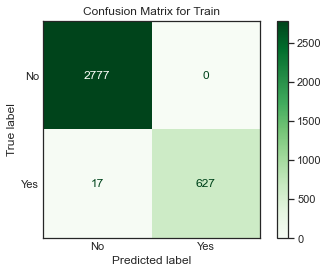

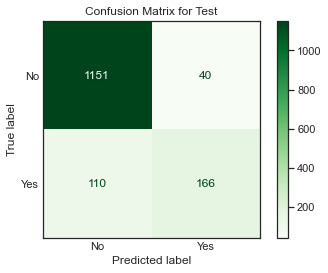

<IPython.core.display.Javascript object>

In [122]:
xgb_score = get_metrics_score(xgb, X_train, X_test, y_train, y_test)
add_score_model(xgb_score)

* All untuned boos model are overfitting the dataset. However XGBoost has the highest recall score on test data.

#### Tuned ADA Boost

In [124]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
    ],
    "n_estimators": np.arange(10, 50, 100),
    "learning_rate": np.arange(0.1, 1, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.9, n_estimators=10, random_state=1)

<IPython.core.display.Javascript object>

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.83864,0.84254,0.29348,0.30072,0.66084,0.68595,0.40645,0.41814


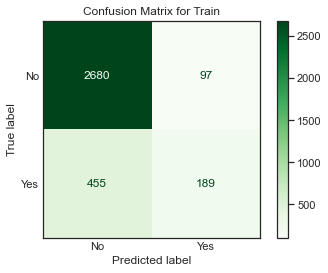

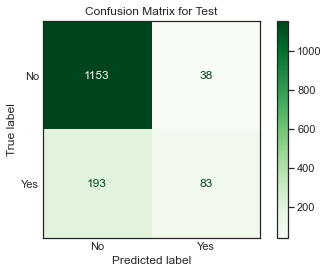

<IPython.core.display.Javascript object>

In [125]:
abc_tuned_score = get_metrics_score(abc_tuned, X_train, X_test, y_train, y_test)
add_score_model(abc_tuned_score)

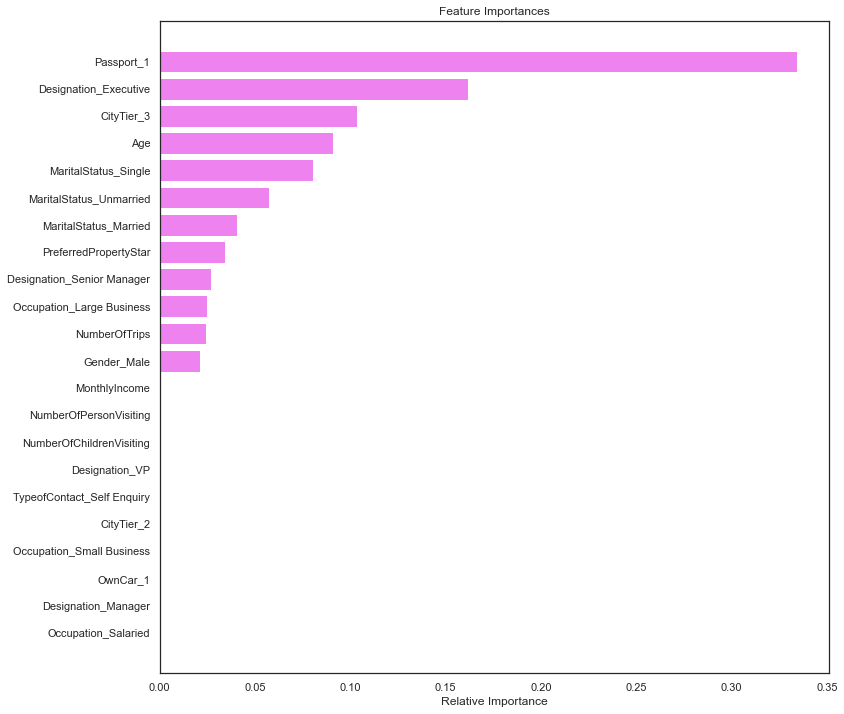

<IPython.core.display.Javascript object>

In [126]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Tuned Gradient Boosting Classifier

In [127]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.89828,0.87526,0.52019,0.45290,0.89572,0.79618,0.65815,0.57737


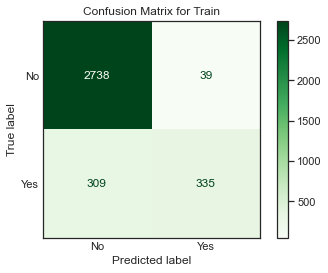

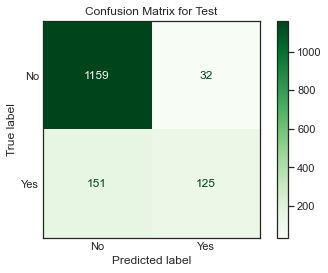

<IPython.core.display.Javascript object>

In [128]:
gbc_tuned_score = get_metrics_score(gbc_tuned, X_train, X_test, y_train, y_test)
add_score_model(gbc_tuned_score)

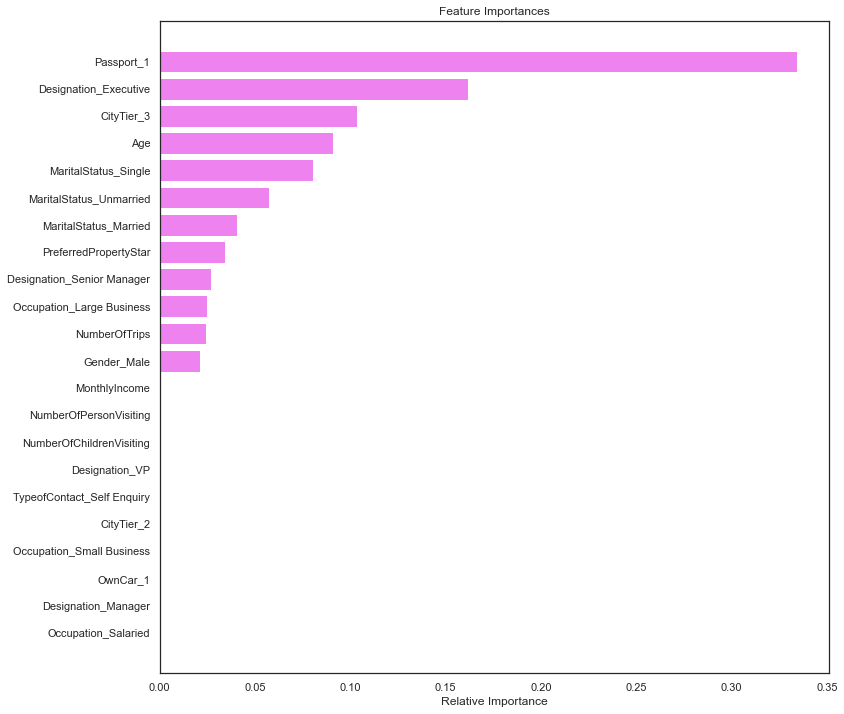

<IPython.core.display.Javascript object>

In [129]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Tuned XGBoost Classifier

In [130]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
## add from

parameters = {
    "n_estimators": np.arange(10, 100, 20),
    "scale_pos_weight": [0, 5],
    "colsample_bylevel": [0.5, 1],
    "learning_rate": [0.001, 0.01, 0.1, 0.5],
}
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.92517,0.85617,0.96894,0.78986,0.72558,0.58760,0.82979,0.67388


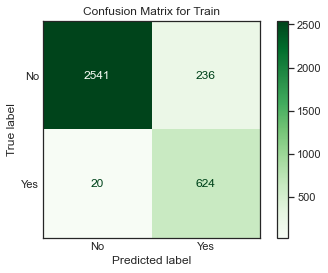

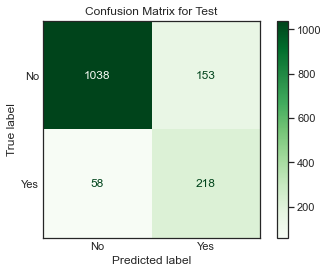

<IPython.core.display.Javascript object>

In [131]:
xgb_tuned_score = get_metrics_score(xgb_tuned, X_train, X_test, y_train, y_test)
add_score_model(xgb_tuned_score)

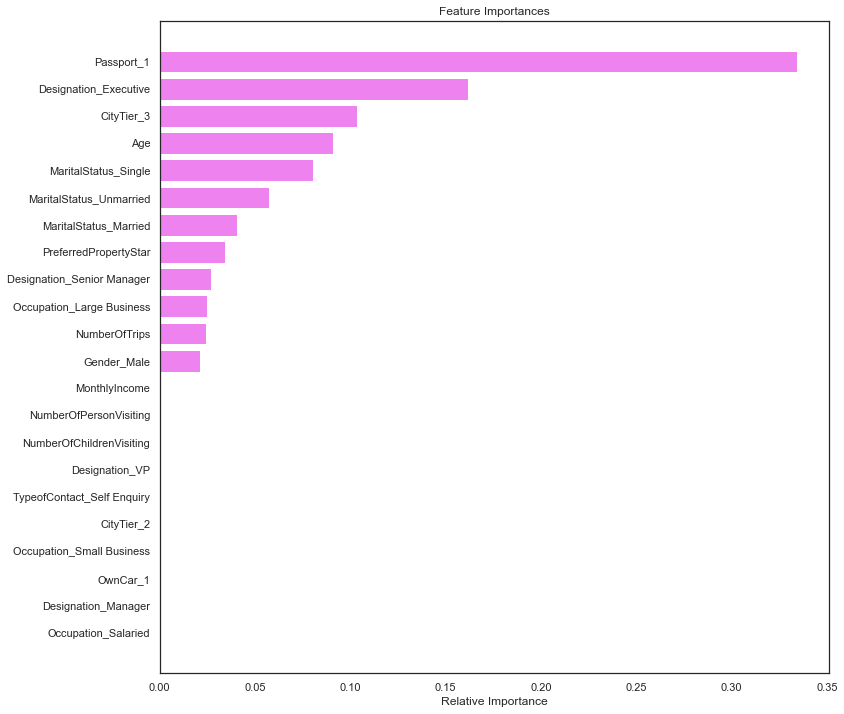

<IPython.core.display.Javascript object>

In [132]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### StackingClassifier

In [133]:
# Building a stacking model with the tuned models - decision tree, random forest,Adaboosting and gradient boosting, then use XGBoost to get the final prediction

estimators = [
    ("Decision Tree", dtree_tuned),
    ("Random Forest", rf_tuned),
    ("AdaBoost", abc_tuned),
    ("Gradient Boosting", gbc_tuned),
]
final_estimator = XGBClassifier(random_state=1, eval_metric="logloss")

<IPython.core.display.Javascript object>

In [134]:
stacking_estimator = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator, cv=5, n_jobs=-1
)
stacking_estimator.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.2,
                                                                     1: 0.8},
                                                       max_depth=7,
                                                       max_leaf_nodes=15,
                                                       min_samples_leaf=2,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.2,
                                                                     1: 0.8},
                                                       max_depth=5,
                                                       max_samples=0.3,
                                                       min_samples_leaf=9,
                                                       n_estim

<IPython.core.display.Javascript object>

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.89097,0.86639,0.54348,0.48551,0.81585,0.71277,0.65238,0.57759


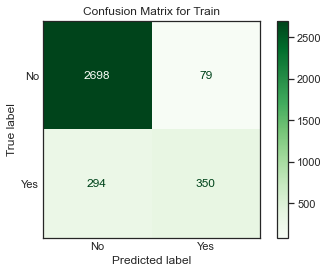

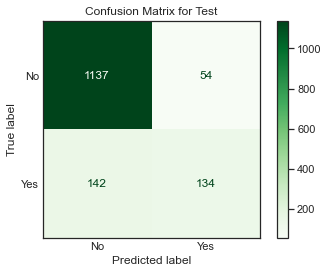

<IPython.core.display.Javascript object>

In [135]:
stacking_estimator = get_metrics_score(
    stacking_estimator, X_train, X_test, y_train, y_test
)

In [136]:
add_score_model(stacking_estimator)

<IPython.core.display.Javascript object>

### Comparing all the models

In [137]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Decision Tree",
            "Random Forest",
            "Bagging Classifier",
            "Tuned Decision Tree",
            "Tuned Random Forest",
            "Tuned Bagging Classifier",
            "AdaBoost",
            "Gradient Boost",
            "XGboost",
            "Tuned AdaBoost",
            "Tuned Gradient Boost",
            "Tuned XGboost",
            "Stacking",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
11,Tuned XGboost,0.92517,0.85617,0.96894,0.78986,0.72558,0.58760,0.82979,0.67388
4,Tuned Random Forest,0.82461,0.82822,0.61335,0.62681,0.52949,0.53727,0.56835,0.57860
3,Tuned Decision Tree,0.79830,0.80709,0.59938,0.62319,0.47188,0.49003,0.52804,0.54864
0,Decision Tree,1.00000,0.87526,1.00000,0.60145,1.00000,0.69456,1.00000,0.64466
8,XGboost,0.99503,0.89775,0.97360,0.60145,1.00000,0.80583,0.98662,0.68880
1,Random Forest,0.99094,0.89775,0.95497,0.56522,0.99676,0.83871,0.97542,0.67532
2,Bagging Classifier,1.00000,0.89502,1.00000,0.48913,1.00000,0.91216,1.00000,0.63679
12,Stacking,0.89097,0.86639,0.54348,0.48551,0.81585,0.71277,0.65238,0.57759
5,Tuned Bagging Classifier,0.99971,0.89230,0.99845,0.47826,1.00000,0.90411,0.99922,0.62559
10,Tuned Gradient Boost,0.89828,0.87526,0.52019,0.45290,0.89572,0.79618,0.65815,0.57737


<IPython.core.display.Javascript object>

* Tuned RandomForest generalized more compare to other models. However Tuned XGboost gave the highest test recall but it's overfitting.
* There might be more room for optimization to improve the models by doing more of the hyperparameter tuning iterations.

### Conclusion

Predictive Model built has been able to show the following:

a) that the company can deploy it to identify customers who will be interested in purchasing the travel package.

b) that the company  can use important factors that will drive the chances that a customer can take a product. 

* Passport, Designation being Executive, City Tier 3, Age, PreferredPropertyStar and MaritalStatus are all important variables for a customer to pick a product.
* Gender,number of children visiting, having a car seemed to be insignificant.

### Insights & Recommendations :

* important features such as Desgination, Passport,TierCity,Martialstatus,occupation are vital to predict cutomers who are likely to purchase a product.
* More customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package  and also increase conversions of marketing campaigns.
* Having a higher duration of pitch by salesman to the customer,getting a PitchSatisfactionScore of 3 or 5 and having multiple follow ups with the customer can help in increasing the chances of the customer buying the travel packages.
* Company should help and promote customers to get a passport , as we see having a passport increases the chances of customer accepting a package.
